### SUGERENCIAS TRAS EL EDA

Ha habido un aumento en los nulos con respecto al dataset anterior. Se sugiere una apuesta conservadora para la gestión de estos nulos (mantenerlos como nulos) para mantener la línea de análisis que ha llevado la empresa hasta el momento.
En cuanto a los duplicados, también ha habido un ligero aumento en los ids duplicados de los apartamentos, para los cuales se sugiere que se eliminen los que correspondan a los anuncios más antiguos.
Se observa un outlier de 6000 € en Valencia que valdría la pena revisar (acommodates 6, quizá el valor aportado es justificado).

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sprint_02 = pd.read_csv(r'C:\Users\Usuario\Desktop\IT Academy\03. Simulaçao Empresarial\Clone\ProjecteData\Equip_19\Data\tourist_accommodation_03112025_clean.csv')
sprint_02.head()

apartment_id                                               name  \
0         11964                                 A ROOM WITH A VIEW   
1         21853                               Bright and airy room   
2         32347  Explore Cultural Sights from a Family-Friendly...   
3         35379                  Double 02 CasanovaRooms Barcelona   
4         35801                  Can Torras Farmhouse Studio Suite   

                                         description  host_id  \
0  Private bedroom in our attic apartment. Right ...    45553   
1  We have a quiet and sunny room with a good vie...    83531   
2  Open French doors and step onto a plant-filled...   139939   
3  Room at a my apartment. Kitchen and 2 bathroom...   152232   
4  Lay in bed & watch sunlight change the mood of...   153805   

                neighbourhood_name neighbourhood_district        room_type  \
0                           Centro                    NaN     Private room   
1                         Cármenes                 Latina     Private room   
2                      San Vicente          Casco Antiguo  Entire home/apt   
3  L'Antiga Esquerra De L'Eixample               Eixample     Private room   
4                            Quart                    NaN     Private room   

   accommodates  bathrooms  bedrooms  ...  review_scores_communication  \
0             2          2       1.0  ...                         10.0   
1             1          1       1.0  ...                         10.0   
2             4          1       2.0  ...                         10.0   
3             2          2       1.0  ...                         10.0   
4             5          1       2.0  ...                         10.0   

  review_scores_location  review_scores_value  is_instant_bookable  \
0                   10.0                 10.0                    0   
1                    8.0                  9.0                    0   
2                   10.0                 10.0                    1   
3                   10.0                  9.0                    1   
4                   10.0                 10.0                    0   

   reviews_per_month  country       city  insert_date  is_valid  ocupacion_mes  
0           0.406532    Spain     Málaga   2018-07-31      True             23  
1           0.244807    Spain     Madrid   2020-10-01      True             30  
2           0.837420    Spain    Sevilla   2019-07-29      True              4  
3           1.757272    Spain  Barcelona   2020-10-01      True             21  
4           0.207533    Spain     Girona   2019-02-19      True             30  

[5 rows x 37 columns]

In [3]:
sprint_03 = pd.read_csv(r'C:\Users\Usuario\Desktop\IT Academy\03. Simulaçao Empresarial\Clone\ProjecteData\Equip_19\Data\tourist_accommodation_10112025_clean.csv')
sprint_03.head()

apartment_id                                               name  \
0         11964                                 A ROOM WITH A VIEW   
1         21853                               Bright and airy room   
2         32347  Explore Cultural Sights from a Family-Friendly...   
3         35379                  Double 02 CasanovaRooms Barcelona   
4         35801                  Can Torras Farmhouse Studio Suite   

                                         description  host_id  \
0  Private bedroom in our attic apartment. Right ...    45553   
1  We have a quiet and sunny room with a good vie...    83531   
2  Open French doors and step onto a plant-filled...   139939   
3  Room at a my apartment. Kitchen and 2 bathroom...   152232   
4  Lay in bed & watch sunlight change the mood of...   153805   

                neighbourhood_name neighbourhood_district        room_type  \
0                           Centro                    NaN     Private room   
1                         Cármenes                 Latina     Private room   
2                      San Vicente          Casco Antiguo  Entire home/apt   
3  L'Antiga Esquerra De L'Eixample               Eixample     Private room   
4                            Quart                    NaN     Private room   

   accommodates  bathrooms  bedrooms  ...  review_scores_communication  \
0             2          2       1.0  ...                         10.0   
1             1          1       1.0  ...                         10.0   
2             4          1       2.0  ...                         10.0   
3             2          2       1.0  ...                         10.0   
4             5          1       2.0  ...                         10.0   

  review_scores_location  review_scores_value  is_instant_bookable  \
0                   10.0                 10.0                    0   
1                    8.0                  9.0                    0   
2                   10.0                 10.0                    1   
3                   10.0                  9.0                    1   
4                   10.0                 10.0                    0   

   reviews_per_month  country       city  insert_date  is_valid  ocupacion_mes  
0           0.406109    Spain     Málaga   2018-07-31      True             23  
1           0.244444    Spain     Madrid   2020-01-10      True             30  
2           0.836473    Spain    Sevilla   2019-07-29      True              4  
3           4.273171    Spain  Barcelona   2020-01-10      True             21  
4           0.207294    Spain     Girona   2019-02-19      True             30  

[5 rows x 37 columns]

In [4]:
sprint_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 9406 non-null   int64  
 1   name                         9403 non-null   object 
 2   description                  9279 non-null   object 
 3   host_id                      9406 non-null   int64  
 4   neighbourhood_name           9406 non-null   object 
 5   neighbourhood_district       5752 non-null   object 
 6   room_type                    9406 non-null   object 
 7   accommodates                 9406 non-null   int64  
 8   bathrooms                    9406 non-null   int64  
 9   bedrooms                     9406 non-null   float64
 10  beds                         9406 non-null   float64
 11  amenities_list               9406 non-null   object 
 12  price                        9406 non-null   float64
 13  minimum_nights    

In [5]:
sprint_03.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'is_valid', 'ocupacion_mes'],
      dtype='object')

In [6]:
sprint_03.isnull().sum().sort_values(ascending=False)


last_review_date               6503
first_review_date              6440
neighbourhood_district         3654
description                     127
name                              3
neighbourhood_name                0
host_id                           0
apartment_id                      0
room_type                         0
bedrooms                          0
beds                              0
accommodates                      0
bathrooms                         0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
amenities_list                    0
price                             0
number_of_reviews                 0
availability_365                  0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication 

In [7]:
# COMPROBACIÓN FILAS DUPLICADAS
duplicados = sprint_03.duplicated()
duplicados.sum()

np.int64(0)

In [8]:
# COMPROBACIÓN APARTMENT_ID DUPLICADOS
duplicados_id = sprint_03.duplicated(subset=['apartment_id'])
duplicados_id.sum()

np.int64(0)

In [9]:
dfnumerics = sprint_03
dfnumerics = dfnumerics.drop('apartment_id', axis=1)
dfnumerics= dfnumerics.drop('host_id',axis=1)
stadistics = dfnumerics.describe().round(2)
stadistics

accommodates  bathrooms  bedrooms     beds    price  minimum_nights  \
count       9406.00    9406.00   9406.00  9406.00  9406.00         9406.00   
mean           4.18       1.55      1.93     2.87  1011.49            4.96   
std            2.46       0.89      1.26     2.10   864.18           17.80   
min            1.00       1.00      1.00     1.00    60.00            1.00   
25%            2.00       1.00      1.00     1.00   450.00            1.00   
50%            4.00       1.00      2.00     2.00   750.00            2.00   
75%            6.00       2.00      3.00     4.00  1240.00            4.00   
max           19.00      13.00     50.00    28.00  7143.00         1125.00   

       maximum_nights  availability_30  availability_60  availability_90  ...  \
count         9406.00          9406.00          9406.00          9406.00  ...   
mean           756.24            12.97            28.67            45.98  ...   
std            499.77            11.84            22.99            33.78  ...   
min              1.00             0.00             0.00             0.00  ...   
25%             60.00             0.00             2.00             9.00  ...   
50%           1125.00            11.00            29.00            49.00  ...   
75%           1125.00            26.00            53.00            80.00  ...   
max           1125.00            30.00            60.00            90.00  ...   

       review_scores_rating  review_scores_accuracy  \
count               9406.00                 9406.00   
mean                  92.54                    9.60   
std                    8.09                    0.85   
min                   20.00                    2.00   
25%                   91.00                    9.00   
50%                   94.00                   10.00   
75%                   97.00                   10.00   
max                  100.00                   10.00   

       review_scores_cleanliness  review_scores_checkin  \
count                    9406.00                9406.00   
mean                        9.42                   9.72   
std                         0.92                   0.73   
min                         2.00                   2.00   
25%                         9.00                  10.00   
50%                        10.00                  10.00   
75%                        10.00                  10.00   
max                        10.00                  10.00   

       review_scores_communication  review_scores_location  \
count                      9406.00                 9406.00   
mean                          9.72                    9.67   
std                           0.74                    0.69   
min                           2.00                    2.00   
25%                          10.00                    9.00   
50%                          10.00                   10.00   
75%                          10.00                   10.00   
max                          10.00                   10.00   

       review_scores_value  is_instant_bookable  reviews_per_month  \
count              9406.00              9406.00            9406.00   
mean                  9.10                 0.58               0.26   
std                   0.86                 0.49               0.45   
min                   2.00                 0.00               0.01   
25%                   9.00                 0.00               0.07   
50%                   9.00                 1.00               0.18   
75%                  10.00                 1.00               0.21   
max                  10.00                 1.00               7.90   

       ocupacion_mes  
count        9406.00  
mean           17.03  
std            11.84  
min             0.00  
25%             4.00  
50%            19.00  
75%            30.00  
max            30.00  

[8 rows x 22 columns]

## Graficas de comparación entre Sprint 02 y Sprint 03

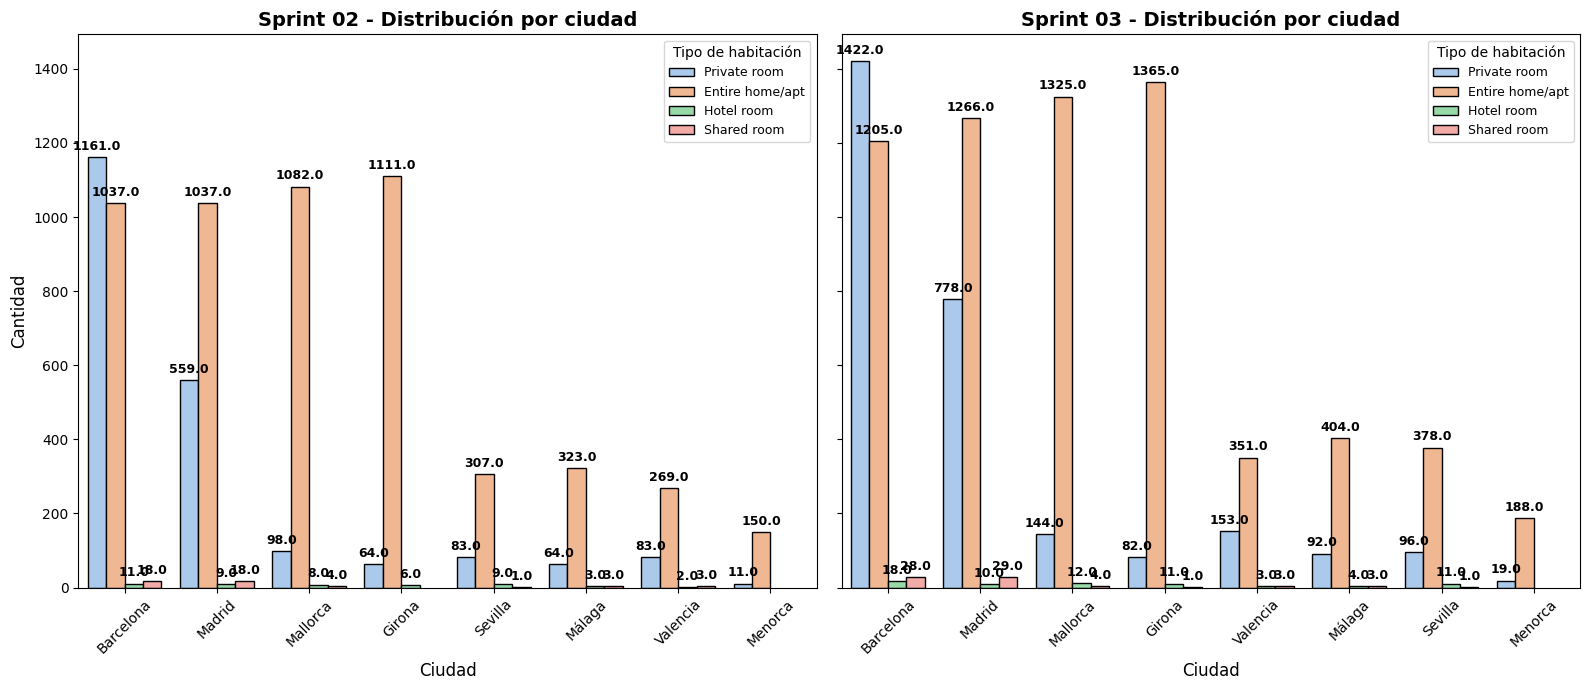

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Sprint 02
sns.countplot(
    data=sprint_02,
    x="city",
    hue="room_type",
    order=sprint_02['city'].value_counts().index,
    palette="pastel",
    edgecolor="black",
    ax=axes[0]
)
axes[0].set_title("Sprint 02 - Distribución por ciudad", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Ciudad", fontsize=12)
axes[0].set_ylabel("Cantidad", fontsize=12)

# Sprint 03
sns.countplot(
    data=sprint_03,
    x="city",
    hue="room_type",
    order=sprint_03['city'].value_counts().index,
    palette="pastel",
    edgecolor="black",
    ax=axes[1]
)
axes[1].set_title("Sprint 03 - Distribución por ciudad", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Ciudad", fontsize=12)
axes[1].set_ylabel("")

# --- Ajustes de layout ---
for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9, fontweight='bold', color='black',
                xytext=(0, 3), textcoords='offset points'
            )
    ax.legend(title="Tipo de habitación", fontsize=9, title_fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


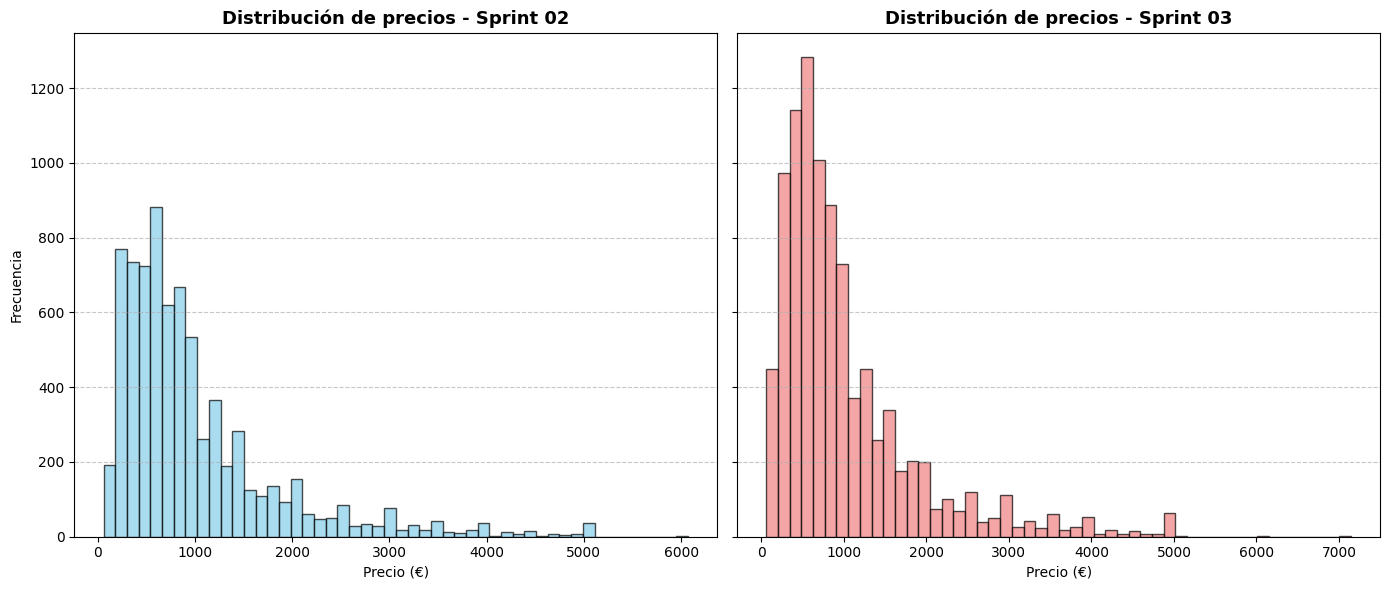

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Sprint 02
axes[0].hist(
    sprint_02['price'], 
    bins=50, 
    color='skyblue', 
    edgecolor='black', 
    alpha=0.7
)
axes[0].set_title("Distribución de precios - Sprint 02", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Precio (€)")
axes[0].set_ylabel("Frecuencia")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Sprint 03
axes[1].hist(
    sprint_03['price'], 
    bins=50, 
    color='lightcoral', 
    edgecolor='black', 
    alpha=0.7
)
axes[1].set_title("Distribución de precios - Sprint 03", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Precio (€)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

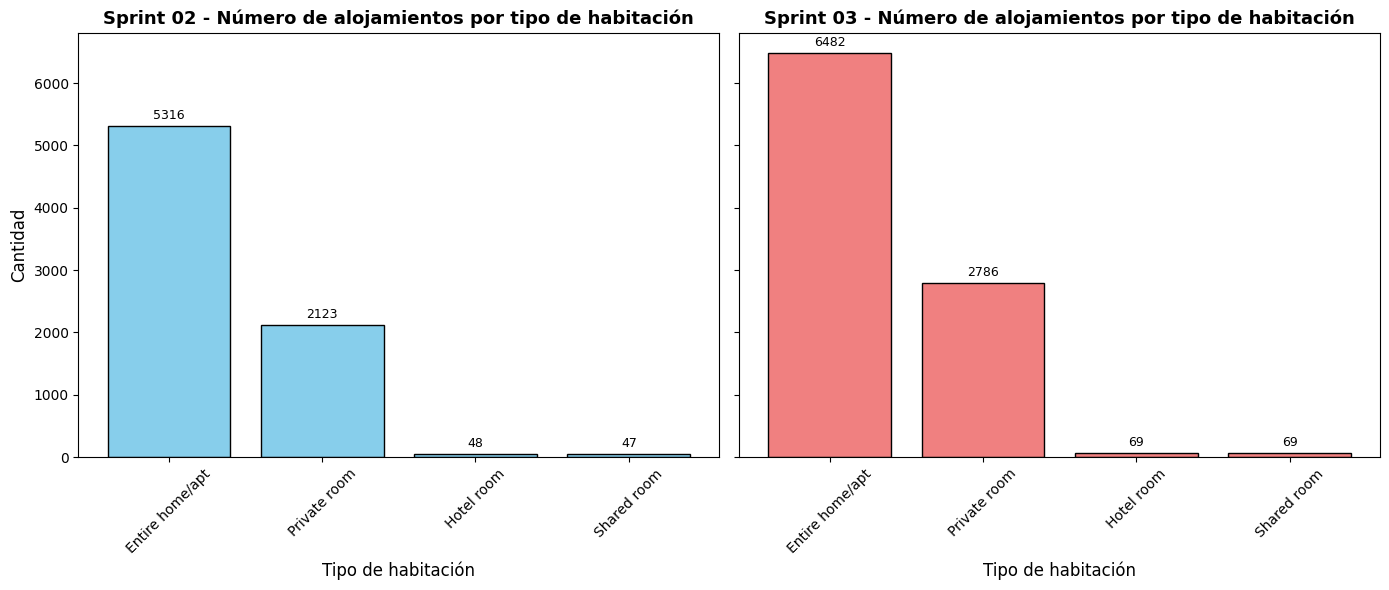

In [13]:
# Contagem por tipo de habitación
counts_02 = sprint_02['room_type'].value_counts()
counts_03 = sprint_03['room_type'].value_counts()

# Criar figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Sprint 02 ---
bars1 = axes[0].bar(counts_02.index, counts_02.values, color='skyblue', edgecolor='black')
axes[0].set_title("Sprint 02 - Número de alojamientos por tipo de habitación", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Tipo de habitación", fontsize=12)
axes[0].set_ylabel("Cantidad", fontsize=12)
axes[0].bar_label(axes[0].containers[0], fmt='%d', fontsize=9, padding=3)
axes[0].tick_params(axis='x', rotation=45)

# --- Sprint 03 ---
bars2 = axes[1].bar(counts_03.index, counts_03.values, color='lightcoral', edgecolor='black')
axes[1].set_title("Sprint 03 - Número de alojamientos por tipo de habitación", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Tipo de habitación", fontsize=12)
axes[1].bar_label(axes[1].containers[0], fmt='%d', fontsize=9, padding=3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [14]:
sprint_03.groupby('neighbourhood_name')['price'].mean().sort_values(ascending=False).round(2)

neighbourhood_name
Ripoll                    4160.0
Torrent                   4000.0
Portbou                   3500.0
Es Migjorn Gran           3230.0
Riudarenes                3190.0
                           ...  
Huerta De Santa Teresa     190.0
San Cristobal              182.5
La Vega Baixa              180.0
Abrantes                   155.0
Salt                       150.0
Name: price, Length: 517, dtype: float64

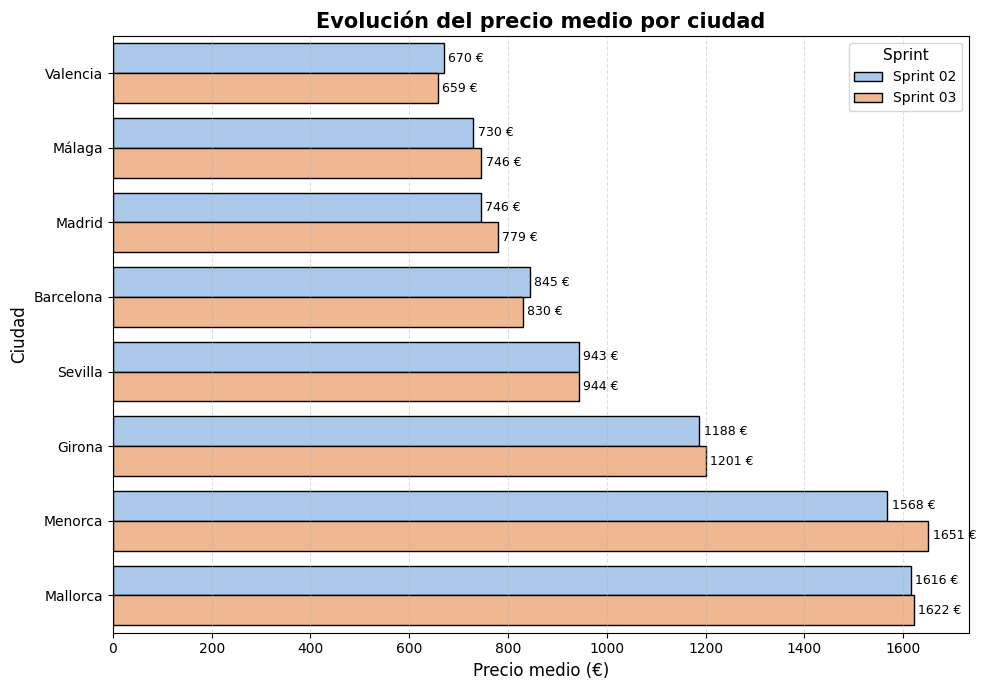

In [16]:
# Calcular o preço médio por cidade em cada sprint
s2_price = sprint_02.groupby('city')['price'].mean().reset_index()
s2_price['sprint'] = 'Sprint 02'

s3_price = sprint_03.groupby('city')['price'].mean().reset_index()
s3_price['sprint'] = 'Sprint 03'

# Combinar ambos os dataframes
evol_price = pd.concat([s2_price, s3_price], ignore_index=True)

# Ordenar cidades pela média geral para manter coerência visual
order_cities = evol_price.groupby('city')['price'].mean().sort_values().index

# Criar gráfico horizontal com seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    data=evol_price,
    y='city',
    x='price',
    hue='sprint',
    order=order_cities,
    palette='pastel',
    edgecolor='black'
)

# Títulos e eixos
ax.set_title("Evolución del precio medio por ciudad", fontsize=15, fontweight='bold')
ax.set_xlabel("Precio medio (€)", fontsize=12)
ax.set_ylabel("Ciudad", fontsize=12)

# Adicionar rótulos numéricos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €', fontsize=9, padding=3)

# Melhorar aparência geral
plt.legend(title="Sprint", fontsize=10, title_fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Análisis estadístico y gráfico de columnas numéricas

Para caracterizar las variables del estudio, se aplicaron las siguientes técnicas:

Prueba de Shapiro-Wilk: Evalúa si una variable sigue una distribución normal. Un valor p < 0,05 indica que no sigue una distribución normal.

Asimetría: Mide la asimetría de la distribución. Los valores altos indican una asimetría significativa.

Método del rango intercuartílico (IQR): Detecta valores atípicos mediante cuartiles:

Un valor atípico se define como cualquier valor inferior a Q1 − 1,5 ⋅ IQR o superior a Q3 + 1,5 ⋅ IQR.

Visualización: Se utilizaron histogramas (con KDE), diagramas de caja y diagramas de dispersión basados ​​en índices para identificar patrones y detectar anomalías.

Este enfoque permite un análisis exhaustivo de las distribuciones de variables, la detección eficaz de valores atípicos y una comprensión más profunda del comportamiento de las soluciones de optimización.

In [17]:
sprint_03.head()

apartment_id                                               name  \
0         11964                                 A ROOM WITH A VIEW   
1         21853                               Bright and airy room   
2         32347  Explore Cultural Sights from a Family-Friendly...   
3         35379                  Double 02 CasanovaRooms Barcelona   
4         35801                  Can Torras Farmhouse Studio Suite   

                                         description  host_id  \
0  Private bedroom in our attic apartment. Right ...    45553   
1  We have a quiet and sunny room with a good vie...    83531   
2  Open French doors and step onto a plant-filled...   139939   
3  Room at a my apartment. Kitchen and 2 bathroom...   152232   
4  Lay in bed & watch sunlight change the mood of...   153805   

                neighbourhood_name neighbourhood_district        room_type  \
0                           Centro                    NaN     Private room   
1                         Cármenes                 Latina     Private room   
2                      San Vicente          Casco Antiguo  Entire home/apt   
3  L'Antiga Esquerra De L'Eixample               Eixample     Private room   
4                            Quart                    NaN     Private room   

   accommodates  bathrooms  bedrooms  ...  review_scores_communication  \
0             2          2       1.0  ...                         10.0   
1             1          1       1.0  ...                         10.0   
2             4          1       2.0  ...                         10.0   
3             2          2       1.0  ...                         10.0   
4             5          1       2.0  ...                         10.0   

  review_scores_location  review_scores_value  is_instant_bookable  \
0                   10.0                 10.0                    0   
1                    8.0                  9.0                    0   
2                   10.0                 10.0                    1   
3                   10.0                  9.0                    1   
4                   10.0                 10.0                    0   

   reviews_per_month  country       city  insert_date  is_valid  ocupacion_mes  
0           0.406109    Spain     Málaga   2018-07-31      True             23  
1           0.244444    Spain     Madrid   2020-01-10      True             30  
2           0.836473    Spain    Sevilla   2019-07-29      True              4  
3           4.273171    Spain  Barcelona   2020-01-10      True             21  
4           0.207294    Spain     Girona   2019-02-19      True             30  

[5 rows x 37 columns]

In [21]:
from scipy.stats import shapiro

In [23]:
def analyze_outliers_and_normality(df):
     
    # Create copy and basic cleaning
    df_clean = sprint_03.copy()
    columns_to_exclude = ['name','description','host_id','neighbourhood_name','neighbourhood_district','room_type','country','city','insert_date','is_valid']
    columns_to_exclude = [col for col in columns_to_exclude if col in df_clean.columns]
    df_clean = df_clean.drop(columns=columns_to_exclude)

    # Select only numeric columns
    numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

    if len(numeric_columns) == 0:
        print("No numeric columns found.")
        return None

    # Set style for plots
    sns.set_style("whitegrid")

    # Threshold for Shapiro-Wilk (avoid on very large samples)
    sample_threshold = 5000

    # List to store results
    results = []

    # Analyze each numeric column
    for column in numeric_columns:    
        data = df_clean[column].dropna()
        n_total = len(df_clean)
        n_valid = len(data)

        if n_valid == 0:
            print("Column is empty.")
            results.append({
                'Column': column,
                'Sample_Size': 0,
                'Skewness': np.nan,
                'Shapiro_p': 'Not applicable',
                'Normal': 'Not applicable',
                'Outliers': 0,
                'Outlier_Percentage': 0.0
            })
            continue

        # Normality Assessment
        skewness = data.skew()
        p_value = np.nan
        is_normal = None
        shapiro_info = ""

        if n_valid < 3:
            print("Sample too small for analysis.")
            is_normal = False
            shapiro_info = "Not applicable"
        elif n_valid < sample_threshold:
            try:
                stat, p_value = shapiro(data)
                is_normal = p_value > 0.05
                shapiro_info = f"p = {p_value:.4f}"
            except Exception as e:
                print(f"Shapiro-Wilk failed: {e}")
                is_normal = abs(skewness) < 0.5  # Fallback using skewness
                shapiro_info = "Error"
        else:
            # For large samples, Shapiro can be overly sensitive; use skewness rule of thumb
            is_normal = abs(skewness) < 0.5
            shapiro_info = f"Ignored (n > {sample_threshold})"

        print(f"Shapiro-Wilk: {shapiro_info}")
        print(f"Skewness: {skewness:.3f}")

        # Outlier Detection (IQR Method)
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
        n_outliers = len(outliers)
        outlier_percentage = (n_outliers / n_total) * 100

        print(f"Outliers (IQR): {n_outliers} ({outlier_percentage:.1f}%)")
        print(f"Bounds: [{lower_bound:.3f}, {upper_bound:.3f}]")

        # Show outlier values
        if n_outliers > 0:
            print("\n   Outlier data points:")
            print(outliers[[column]].to_string(index=True))

        # Plotting
        fig, axes = plt.subplots(1, 3, figsize=(16, 5))

        # Histogram with KDE
        sns.histplot(data, kde=True, bins=25, ax=axes[0], color='skyblue', alpha=0.8)
        axes[0].axvline(lower_bound, color='red', linestyle='--', linewidth=1.2,
                        label=f'Lower bound: {lower_bound:.2f}')
        axes[0].axvline(upper_bound, color='red', linestyle='--', linewidth=1.2,
                        label=f'Upper bound: {upper_bound:.2f}')
        axes[0].set_title(f'Distribution of {column}')
        axes[0].legend(fontsize=9)

        # Boxplot
        sns.boxplot(y=data, ax=axes[1], color='salmon')
        axes[1].set_title(f'Boxplot of {column}')

        # Scatter plot by index (highlighting outliers)
        df_plot = df_clean.reset_index()
        colors = ['red' if (val < lower_bound or val > upper_bound) else 'gray' for val in df_plot[column]]
        axes[2].scatter(df_plot.index, df_plot[column], c=colors, s=25, alpha=0.7)
        axes[2].axhline(lower_bound, color='red', linestyle='--', linewidth=1)
        axes[2].axhline(upper_bound, color='red', linestyle='--', linewidth=1)
        axes[2].set_title(f'{column} by Index (outliers in red)')
        axes[2].set_xlabel('Index')
        axes[2].set_ylabel(column)

        plt.tight_layout()
        plt.show()

        # Store results
        results.append({
            'Column': column,
            'Sample_Size': n_valid,
            'Skewness': round(skewness, 3),
            'Shapiro_p': round(p_value, 4) if not pd.isna(p_value) else shapiro_info,
            'Normal': 'Yes' if is_normal else 'No' if is_normal is not None else 'Not evaluated',
            'Outliers': n_outliers,
            'Outlier_Percentage': round(outlier_percentage, 1)
        })

    # Final Summary (outside loop!)
    df_summary = pd.DataFrame(results)
    df_display = df_summary.copy()
    df_display['Outlier_Percentage'] = df_display['Outlier_Percentage'].astype(str) + '%'

    # Print full table
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        print(df_display.to_string(index=False))

    return df_summary

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 0.085
Outliers (IQR): 0 (0.0%)
Bounds: [-11676905.875, 54794809.125]


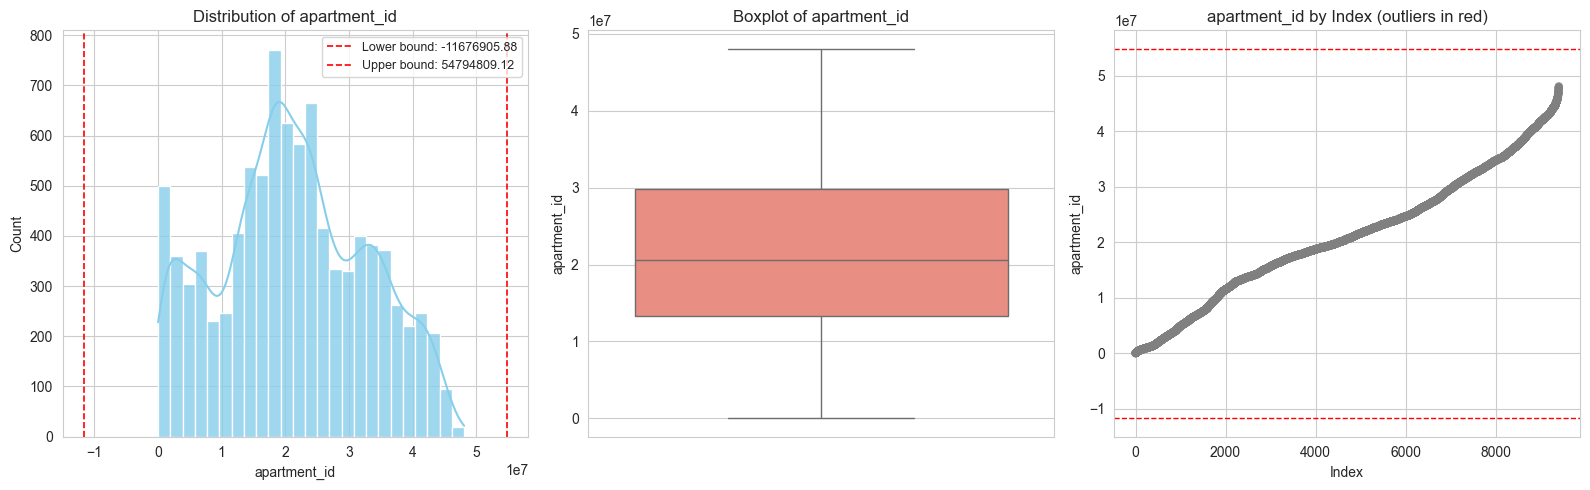

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 1.144
Outliers (IQR): 56 (0.6%)
Bounds: [-4.000, 12.000]

   Outlier data points:
      accommodates
155             13
156             15
258             13
283             16
306             14
341             13
350             16
358             16
391             16
479             16
502             14
541             16
561             16
764             16
815             16
1000            15
1093            16
1135            16
1272            14
1317            16
1451            16
1452            13
1520            16
1572            13
1659            16
1834            16
1947            16
1952            16
2227            16
2448            16
2924            14
3028            14
3441            16
3551            15
4656            16
5029            15
5211            16
5355            16
5648            16
6143            13
6200            16
6481            14
7608            19
7922            14
7933            16
7

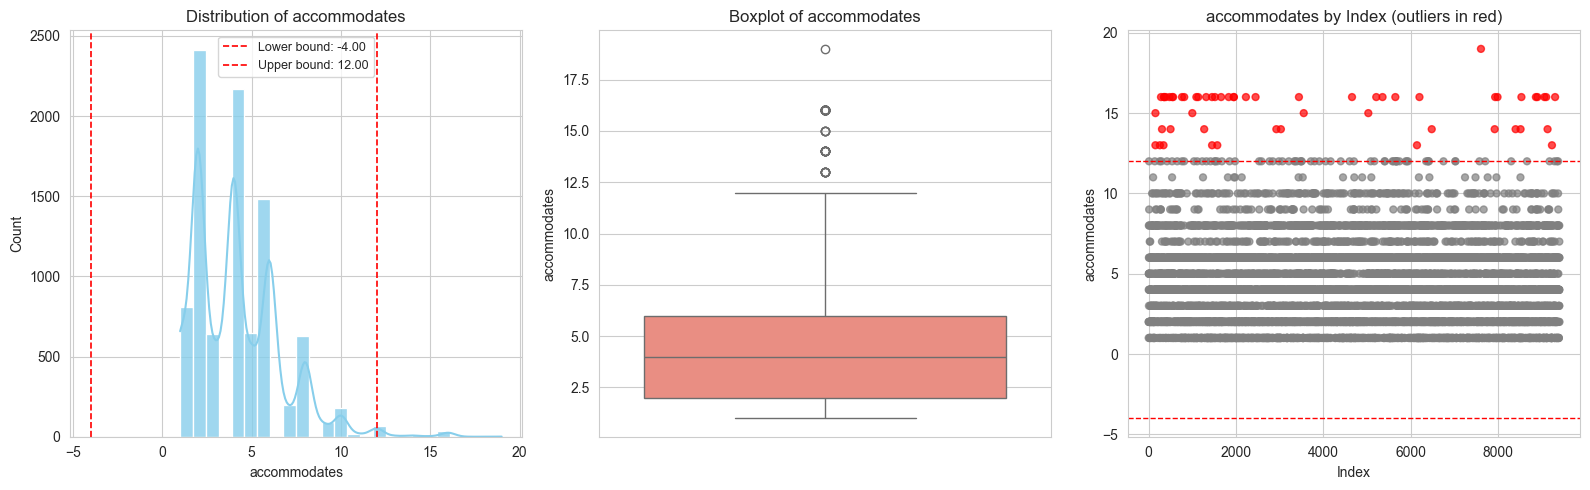

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 2.740
Outliers (IQR): 357 (3.8%)
Bounds: [-0.500, 3.500]

   Outlier data points:
      bathrooms
25            5
66            4
80            4
155           4
156           7
176           4
254           4
275           5
306           6
314           4
321           6
341           4
380           5
420           6
426           4
474           4
476           4
493           5
561           4
601           4
614           4
625           4
626           4
636           6
644           4
668           5
689           6
692           5
763           4
764           4
807           6
815           5
874           4
955           4
997           4
1003          4
1010          4
1023          4
1038          5
1049          4
1050          4
1079          4
1082          4
1093          4
1112          4
1137          8
1173          4
1228          4
1252          4
1272          4
1301          4
1317          4
1323          4
1417       

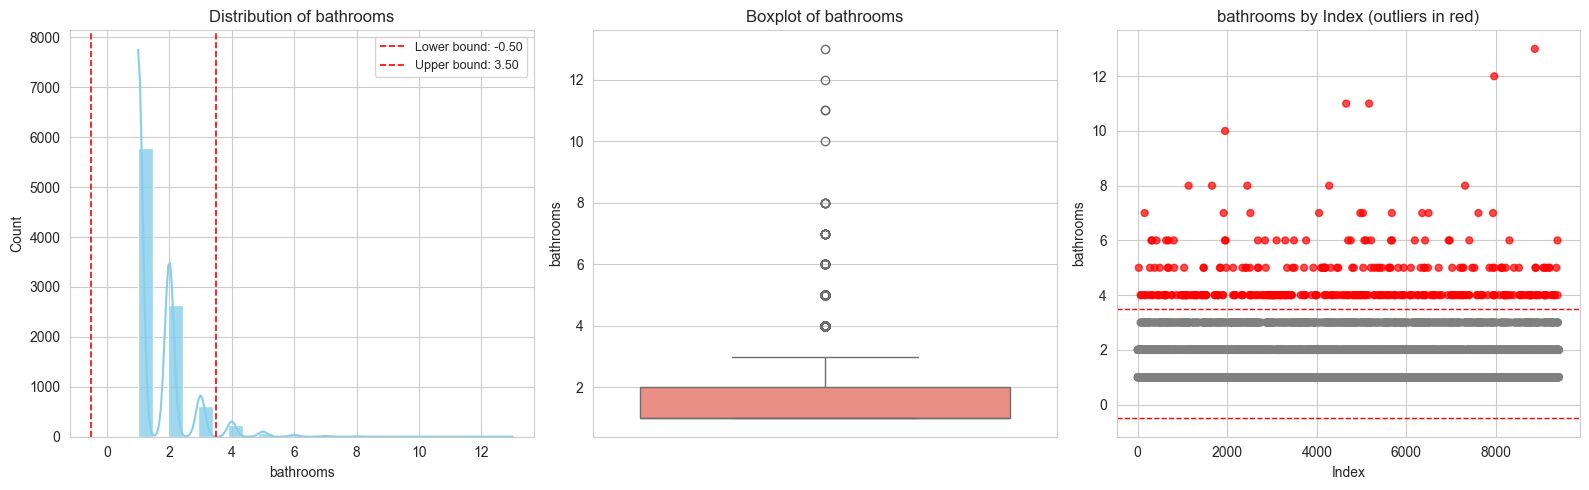

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 7.052
Outliers (IQR): 25 (0.3%)
Bounds: [-2.000, 6.000]

   Outlier data points:
      bedrooms
561        8.0
815        9.0
1093       8.0
1317       7.0
1572       8.0
1834       9.0
1947       8.0
1952       7.0
2448      12.0
3028       7.0
3209       8.0
3441       7.0
4656      12.0
5355       7.0
5673       7.0
6481       7.0
6750       8.0
7310       8.0
7608       7.0
7933       7.0
7961      50.0
8401       7.0
8866      12.0
9133       7.0
9179       7.0


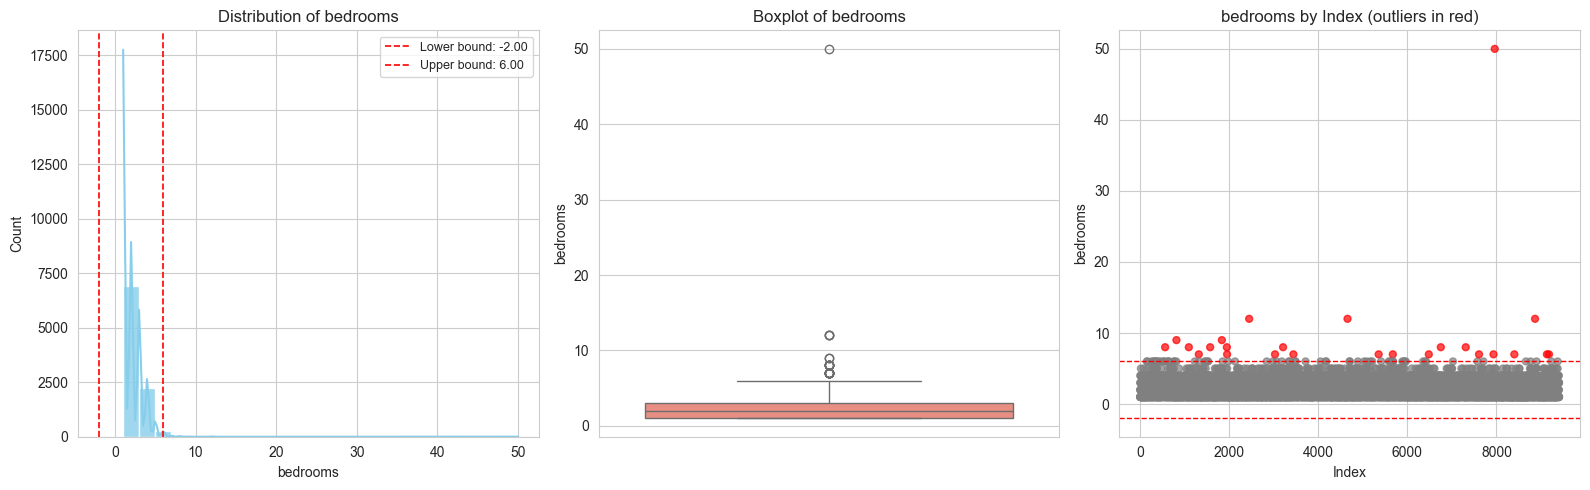

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 1.913
Outliers (IQR): 161 (1.7%)
Bounds: [-3.500, 8.500]

   Outlier data points:
      beds
9     14.0
140   12.0
155   13.0
156   15.0
176    9.0
198   10.0
254    9.0
258   10.0
283   14.0
292   10.0
341    9.0
350   16.0
358   16.0
391   22.0
405   10.0
479    9.0
502   14.0
537    9.0
538   12.0
541   16.0
561   11.0
572    9.0
644    9.0
654   10.0
660    9.0
726    9.0
763    9.0
764   20.0
813   10.0
815   16.0
1079  10.0
1093  13.0
1122   9.0
1135  10.0
1272  14.0
1301  10.0
1317   9.0
1417  10.0
1423   9.0
1451  16.0
1519  10.0
1520  15.0
1531  10.0
1571   9.0
1572  14.0
1592  10.0
1604   9.0
1659  16.0
1702  12.0
1775   9.0
1815  11.0
1834  12.0
1852  11.0
1919  10.0
1952  18.0
1954   9.0
1977  10.0
2107   9.0
2131  12.0
2224  10.0
2227  16.0
2409  10.0
2448  18.0
2505  10.0
2530   9.0
2768  12.0
2783   9.0
2840  10.0
2843  10.0
2924  14.0
2981   9.0
2997   9.0
3028  10.0
3062  12.0
3260  10.0
3292  10.0
3310   9.0
3326   9.0
3356  

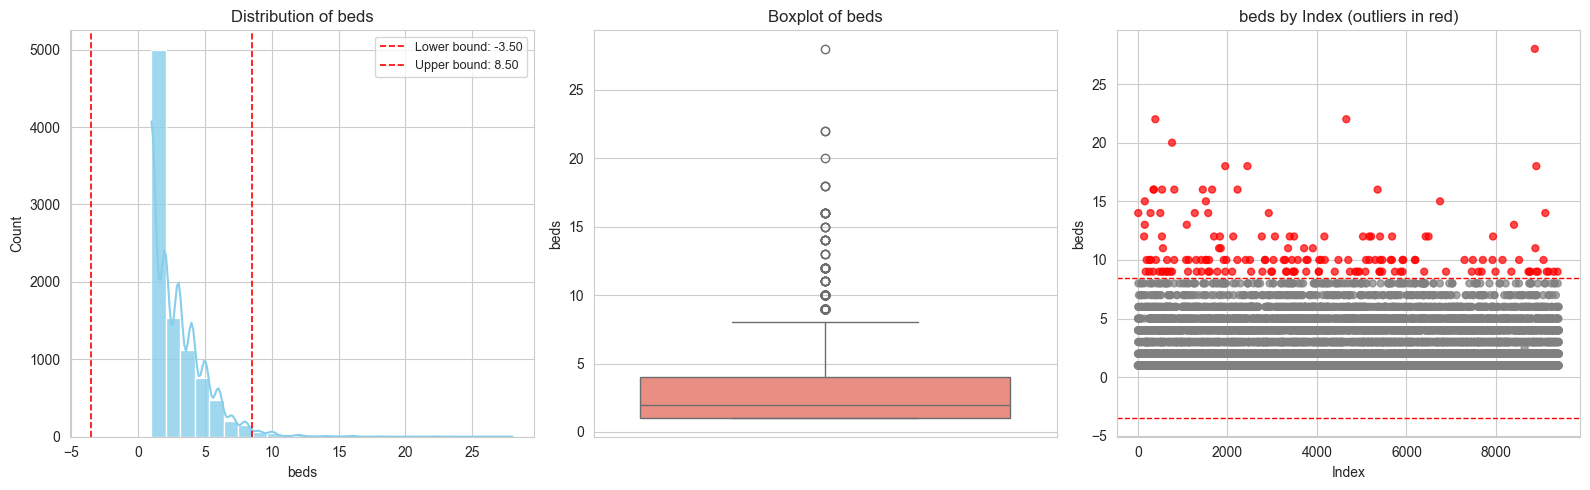

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 2.094
Outliers (IQR): 715 (7.6%)
Bounds: [-735.000, 2425.000]

   Outlier data points:
       price
7     3900.0
9     3000.0
12    2800.0
66    3980.0
84    5000.0
102   3300.0
156   4700.0
246   2500.0
247   2600.0
251   2600.0
258   3200.0
285   4800.0
292   4000.0
306   3600.0
314   2500.0
321   4000.0
325   2450.0
341   3490.0
350   3500.0
358   3000.0
371   2500.0
385   2500.0
391   5000.0
404   3200.0
417   2500.0
420   4090.0
474   2800.0
479   2600.0
493   2770.0
495   3210.0
538   4500.0
540   2500.0
541   3200.0
558   3500.0
561   4160.0
572   2500.0
580   5000.0
614   2500.0
631   4290.0
635   3000.0
636   4900.0
644   2900.0
645   2990.0
647   2890.0
654   3750.0
679   2450.0
680   2600.0
681   4250.0
689   3680.0
730   3000.0
742   2850.0
762   2990.0
763   2840.0
764   3950.0
778   3000.0
815   4700.0
827   2750.0
844   2500.0
952   2650.0
957   5000.0
999   3000.0
1003  2490.0
1010  3500.0
1017  2430.0
1023  2500.0
1036  3000.0

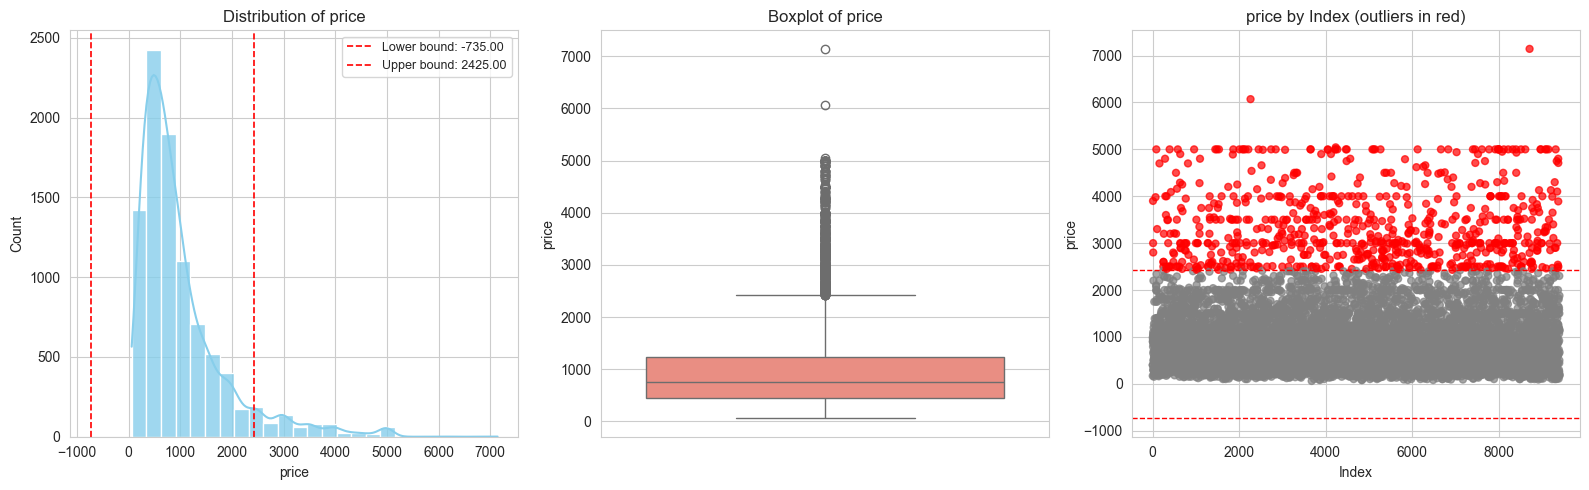

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 33.986
Outliers (IQR): 616 (6.5%)
Bounds: [-3.500, 8.500]

   Outlier data points:
      minimum_nights
30                31
33                30
35                32
41                14
43                14
49                20
50                32
113               32
134               90
147               60
188               32
194               90
217               15
312               30
316               15
345               28
349               31
365               30
390               32
426               15
427               32
433               31
436               31
450               60
461               30
487               45
490               32
511               32
549               32
590               60
591               32
621               12
622               30
721               30
722               15
732               30
738               90
773               30
828               32
836               30
842          

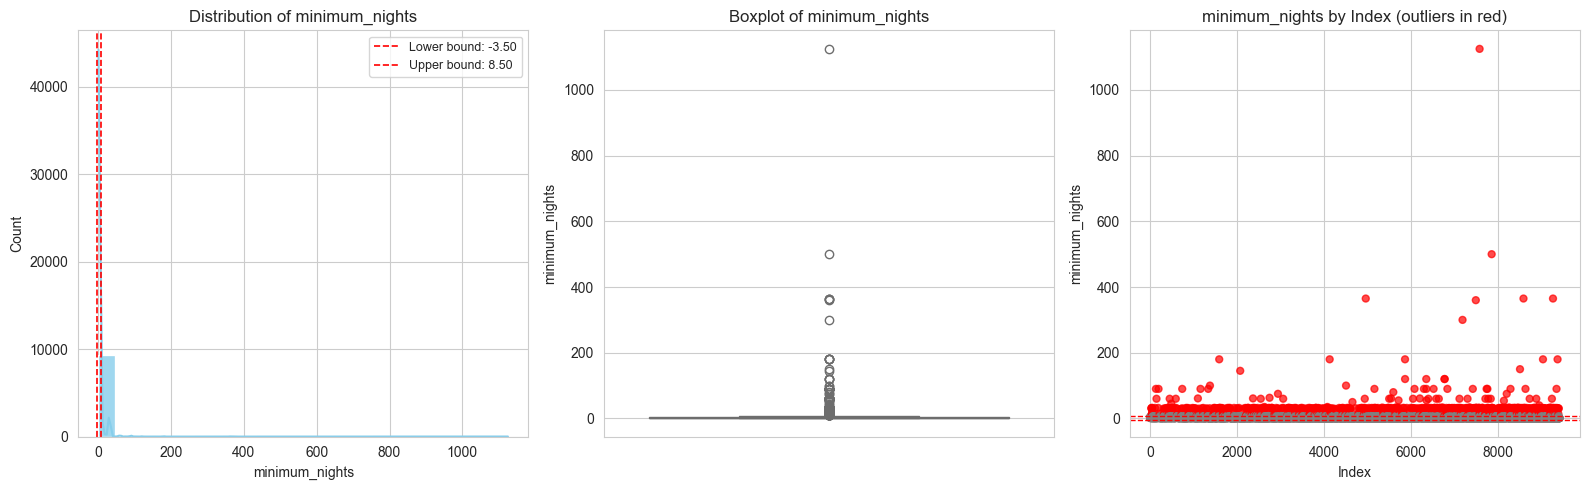

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -0.663
Outliers (IQR): 0 (0.0%)
Bounds: [-1537.500, 2722.500]


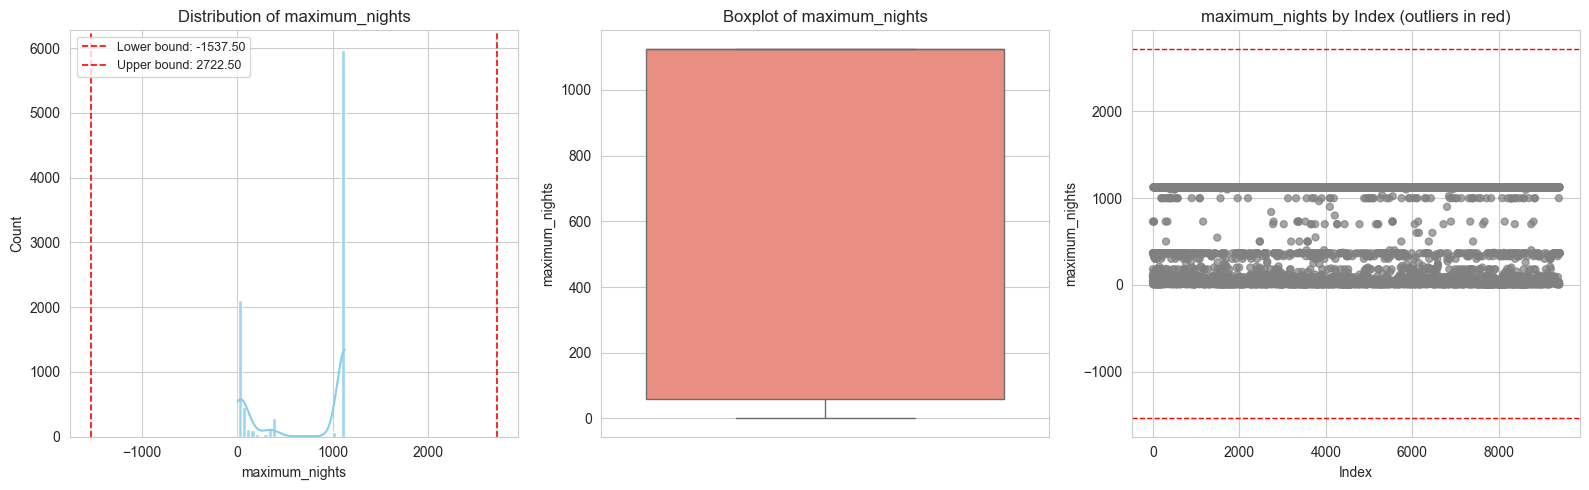

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 0.247
Outliers (IQR): 0 (0.0%)
Bounds: [-39.000, 65.000]


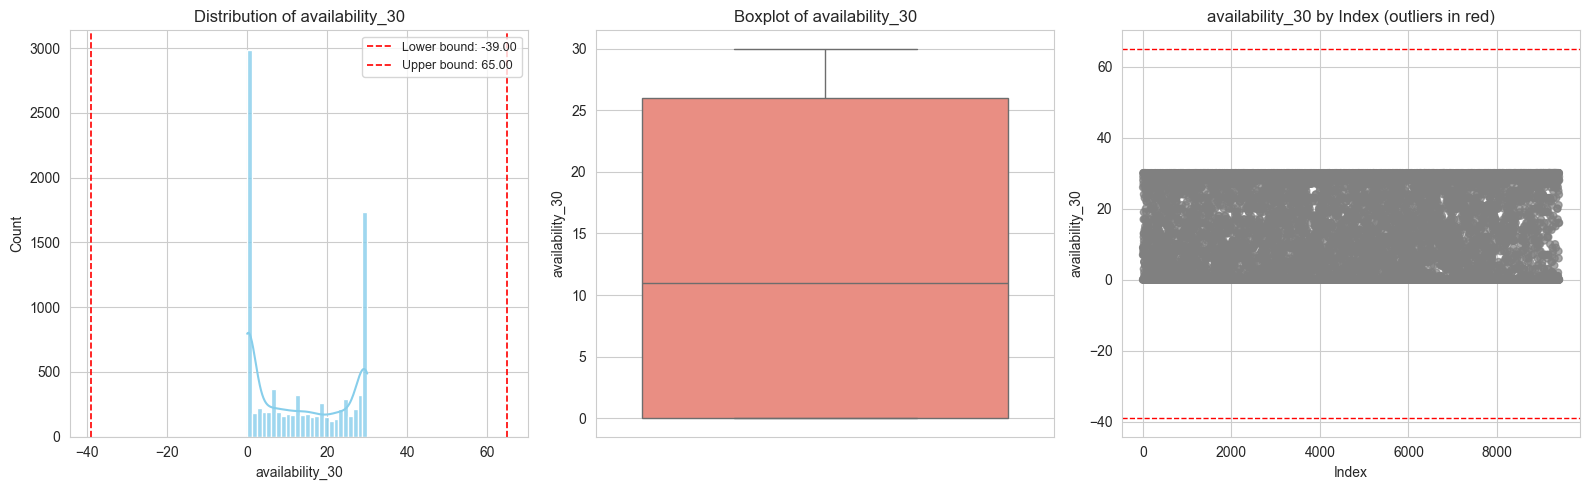

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 0.037
Outliers (IQR): 0 (0.0%)
Bounds: [-74.500, 129.500]


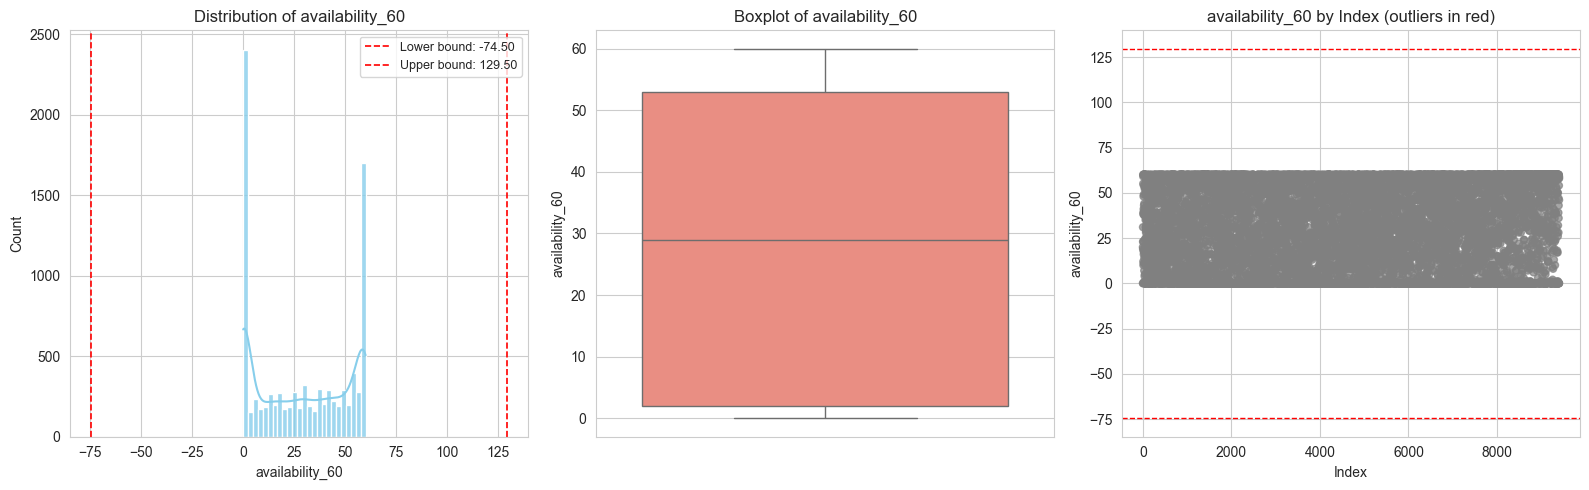

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -0.119
Outliers (IQR): 0 (0.0%)
Bounds: [-97.500, 186.500]


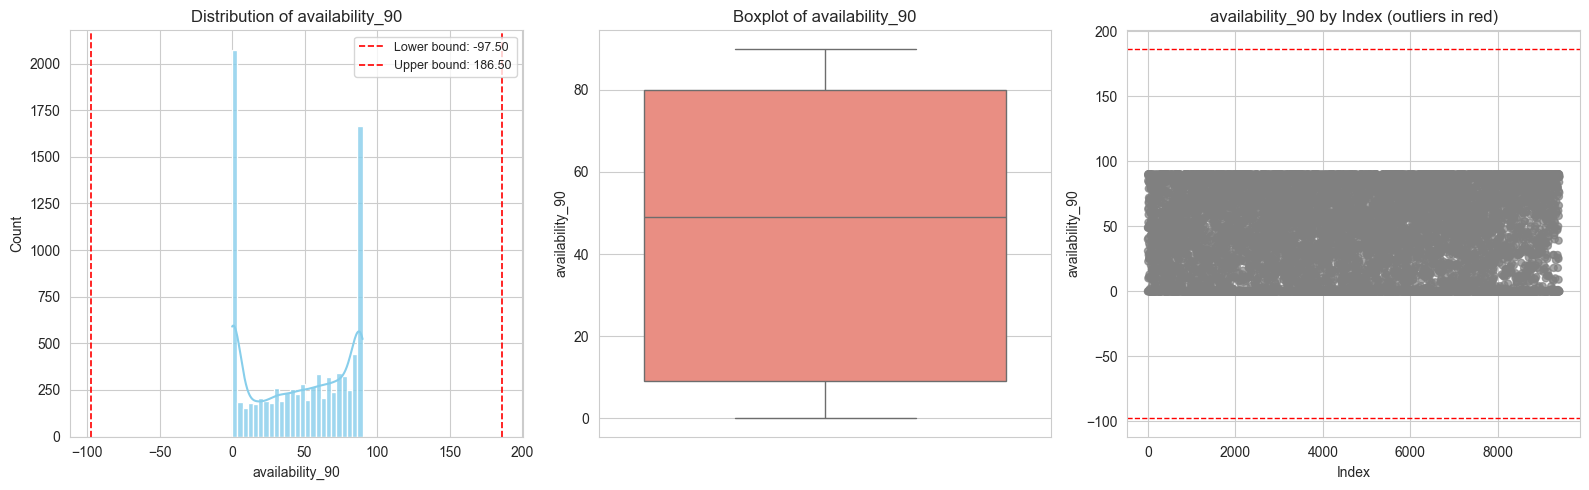

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -0.071
Outliers (IQR): 0 (0.0%)
Bounds: [-313.000, 695.000]


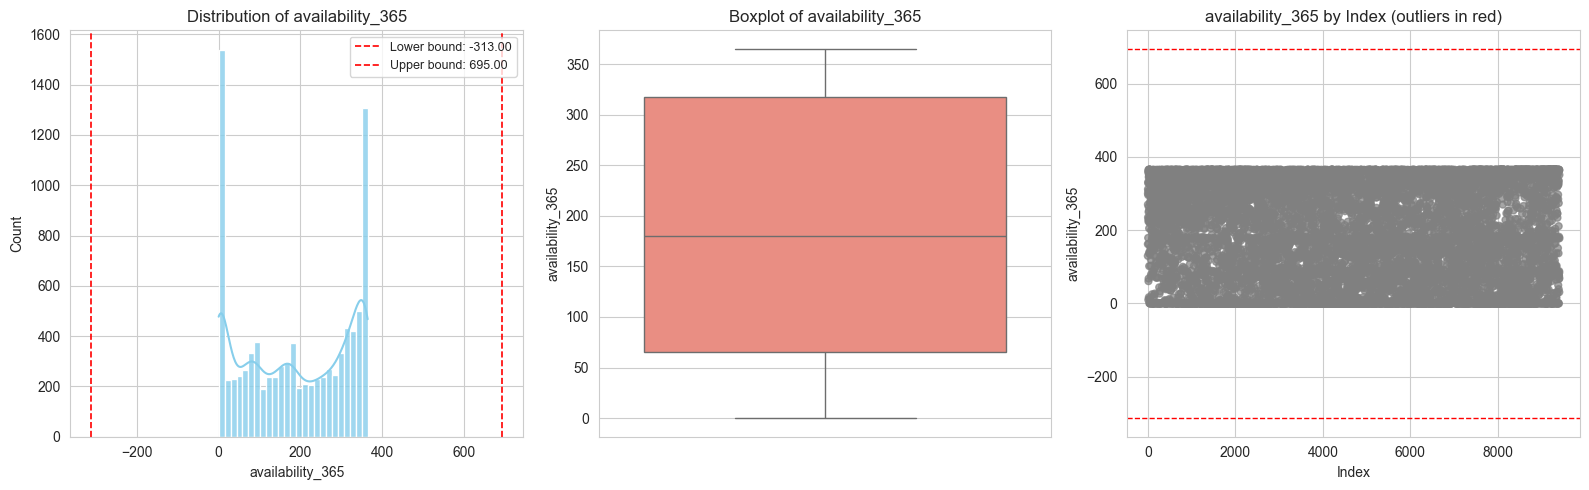

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 3.943
Outliers (IQR): 1076 (11.4%)
Bounds: [-42.000, 70.000]

   Outlier data points:
      number_of_reviews
0                  78.0
2                 148.0
3                 292.0
6                 382.0
8                 108.0
9                 120.0
11                189.0
13                322.0
14                181.0
15                 77.0
18                154.0
19                184.0
20                235.0
22                 97.0
24                189.0
25                156.0
28                416.0
29                125.0
30                 77.0
31                 90.0
32                168.0
33                144.0
34                172.0
37                102.0
38                170.0
44                156.0
47                103.0
48                247.0
52                 91.0
57                588.0
58                207.0
59                139.0
60                199.0
61                128.0
67                 71.0
68     

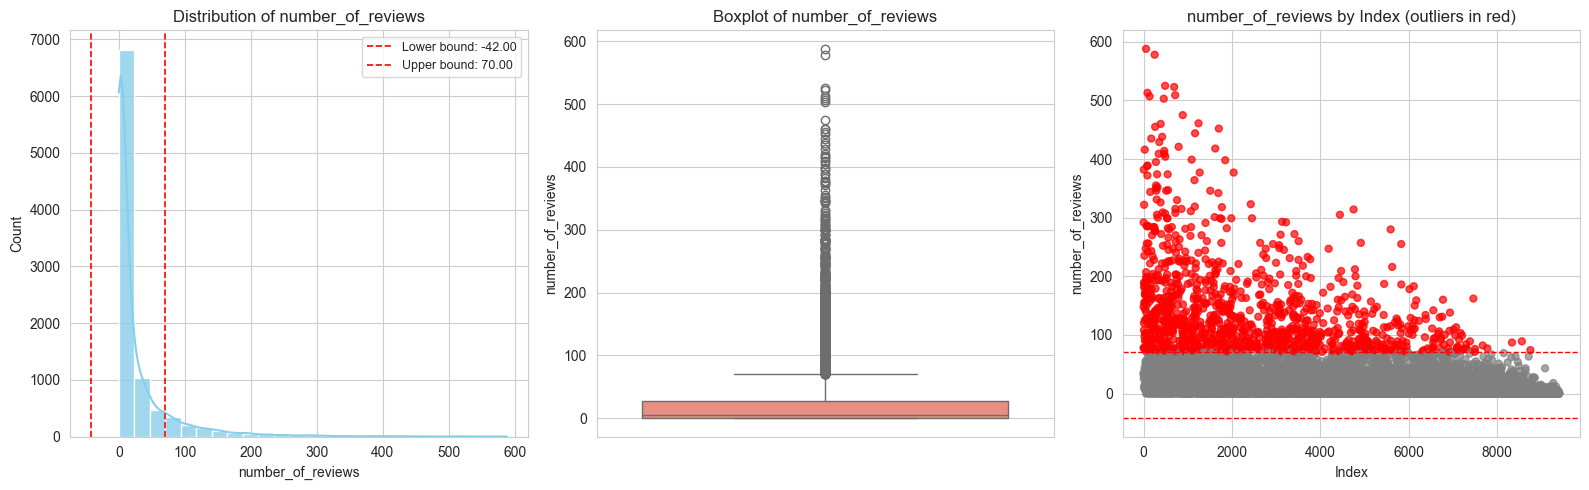

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -3.299
Outliers (IQR): 834 (8.9%)
Bounds: [82.000, 106.000]

   Outlier data points:
      review_scores_rating
44                    73.0
56                    71.0
118                   60.0
123                   80.0
157                   72.0
183                   80.0
211                   80.0
269                   80.0
289                   81.0
292                   81.0
310                   72.0
332                   60.0
339                   71.0
346                   77.0
364                   72.0
385                   55.0
387                   64.0
413                   75.0
420                   60.0
427                   80.0
429                   80.0
444                   80.0
446                   80.0
450                   60.0
487                   80.0
497                   78.0
508                   75.0
528                   80.0
530                   71.0
536                   80.0
551                   80.0
565     

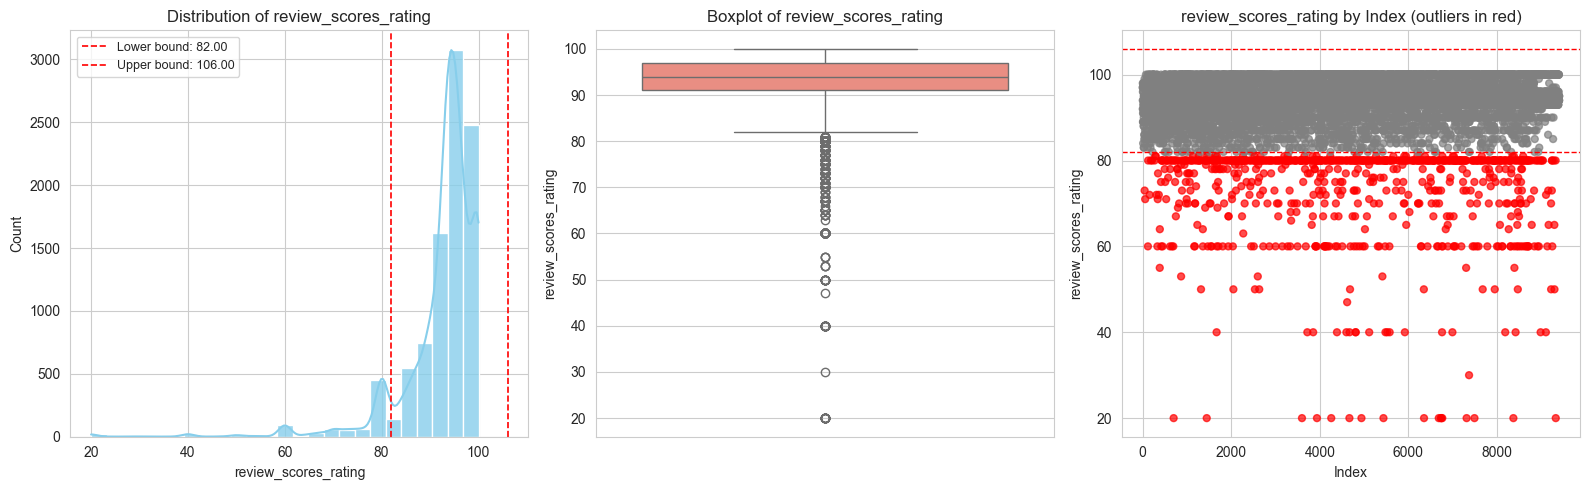

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -3.693
Outliers (IQR): 230 (2.4%)
Bounds: [7.500, 11.500]

   Outlier data points:
      review_scores_accuracy
56                       7.0
118                      6.0
157                      7.0
183                      7.0
309                      7.0
332                      5.0
339                      7.0
385                      6.0
387                      6.0
413                      5.0
420                      2.0
450                      4.0
478                      7.0
530                      7.0
551                      7.0
618                      7.0
661                      6.0
679                      7.0
813                      7.0
867                      7.0
992                      7.0
1078                     7.0
1107                     7.0
1177                     6.0
1180                     7.0
1234                     7.0
1254                     6.0
1297                     6.0
1317                     5.0
1358

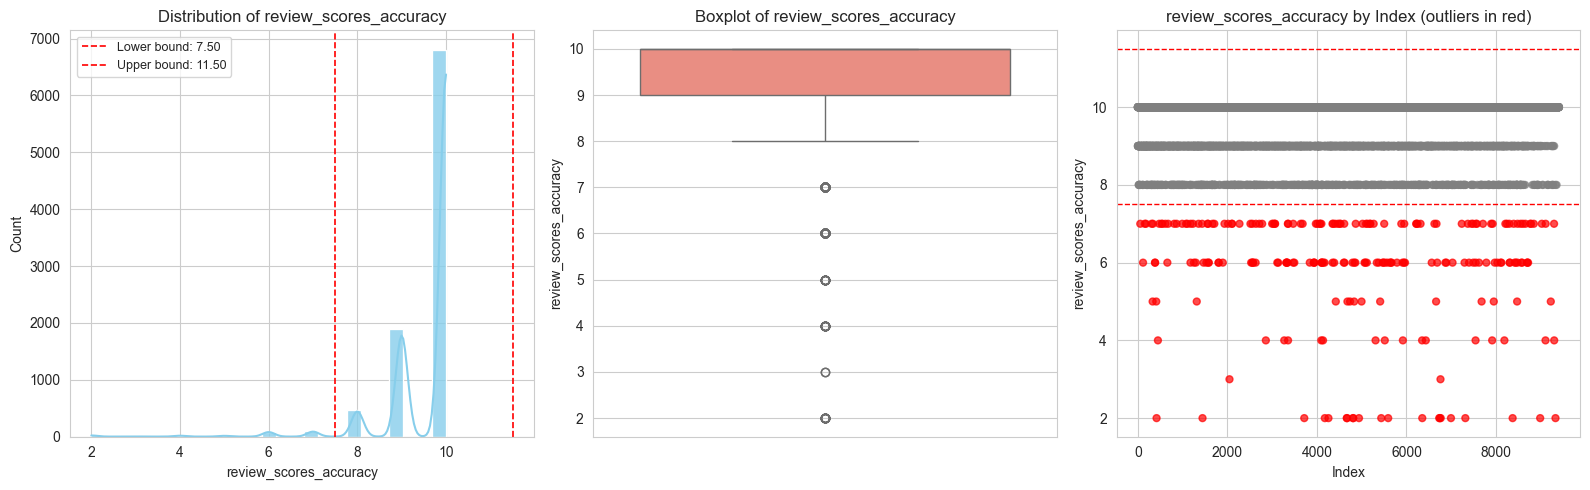

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -2.944
Outliers (IQR): 292 (3.1%)
Bounds: [7.500, 11.500]

   Outlier data points:
      review_scores_cleanliness
44                          7.0
54                          7.0
118                         6.0
220                         6.0
309                         7.0
332                         7.0
339                         7.0
356                         7.0
385                         6.0
387                         7.0
393                         7.0
413                         6.0
446                         6.0
448                         7.0
537                         7.0
661                         5.0
784                         7.0
796                         6.0
809                         6.0
867                         5.0
887                         6.0
992                         4.0
1021                        7.0
1061                        6.0
1112                        6.0
1177                        6.0
1185      

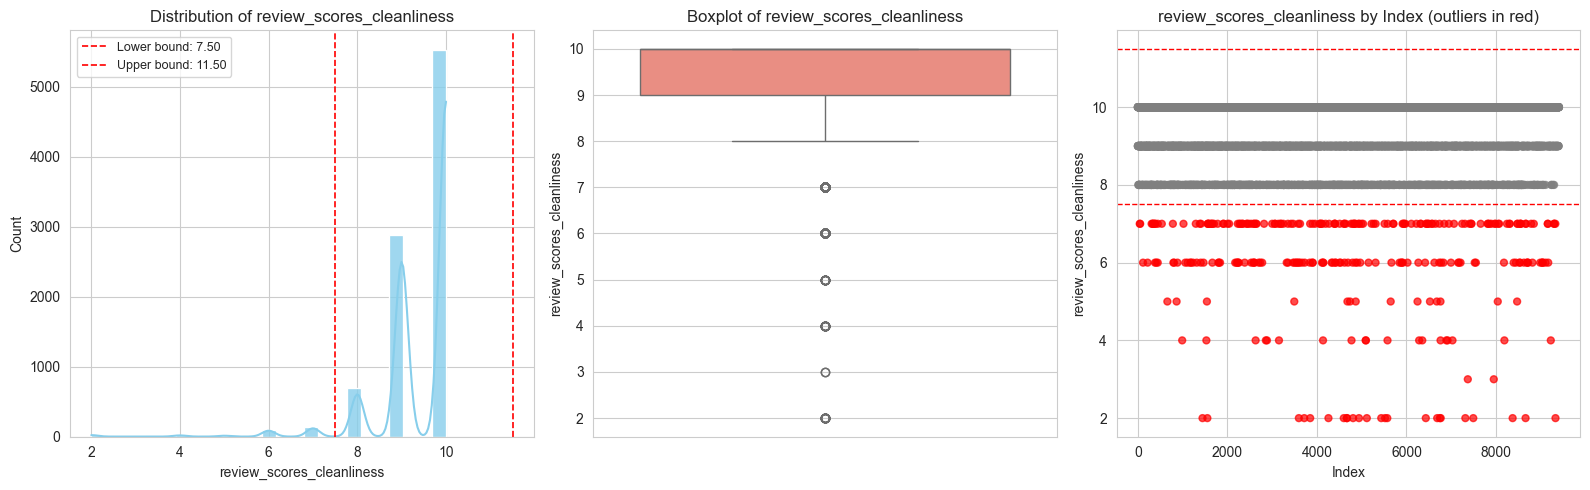

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -4.667
Outliers (IQR): 1802 (19.2%)
Bounds: [10.000, 10.000]

   Outlier data points:
      review_scores_checkin
6                       9.0
15                      9.0
18                      9.0
21                      9.0
25                      9.0
26                      9.0
27                      9.0
30                      9.0
32                      9.0
33                      9.0
35                      9.0
44                      9.0
47                      9.0
50                      9.0
52                      9.0
53                      9.0
54                      8.0
56                      9.0
65                      9.0
68                      9.0
73                      6.0
74                      9.0
75                      9.0
81                      9.0
85                      9.0
86                      9.0
87                      9.0
92                      9.0
96                      9.0
97                      9.0
102

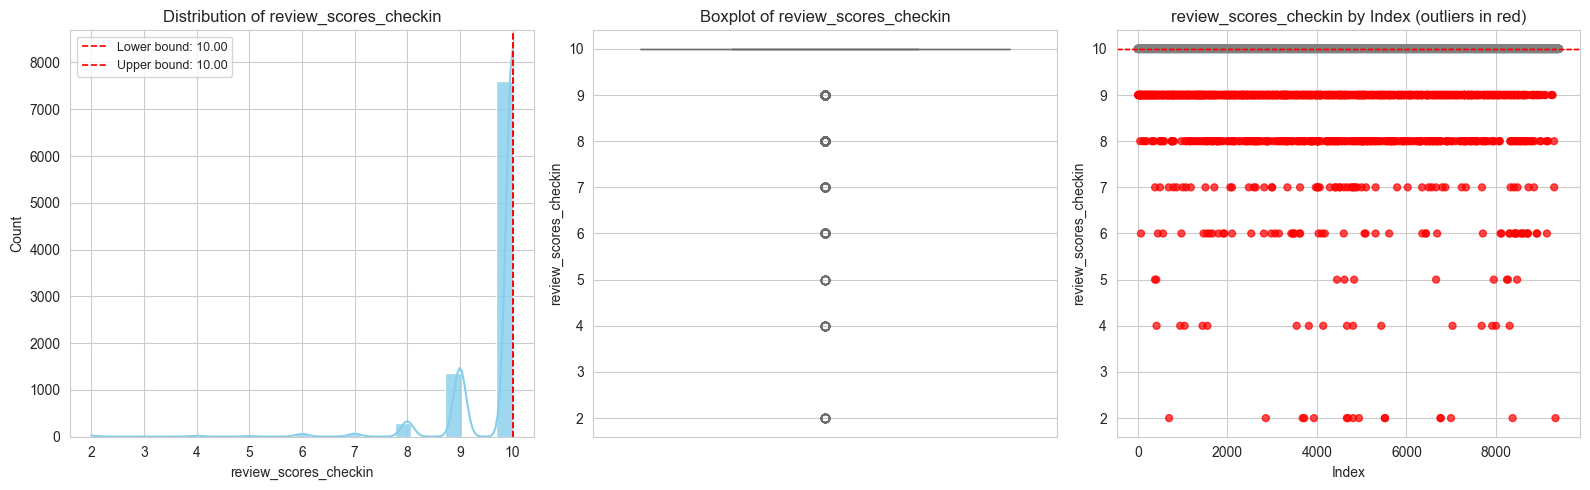

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -4.587
Outliers (IQR): 1808 (19.2%)
Bounds: [10.000, 10.000]

   Outlier data points:
      review_scores_communication
6                             9.0
7                             9.0
10                            9.0
15                            9.0
16                            9.0
18                            9.0
21                            9.0
25                            9.0
28                            9.0
30                            9.0
32                            9.0
33                            9.0
34                            9.0
35                            9.0
39                            9.0
43                            9.0
44                            9.0
46                            9.0
47                            9.0
50                            9.0
52                            9.0
53                            9.0
54                            8.0
56                            8.0
68                   

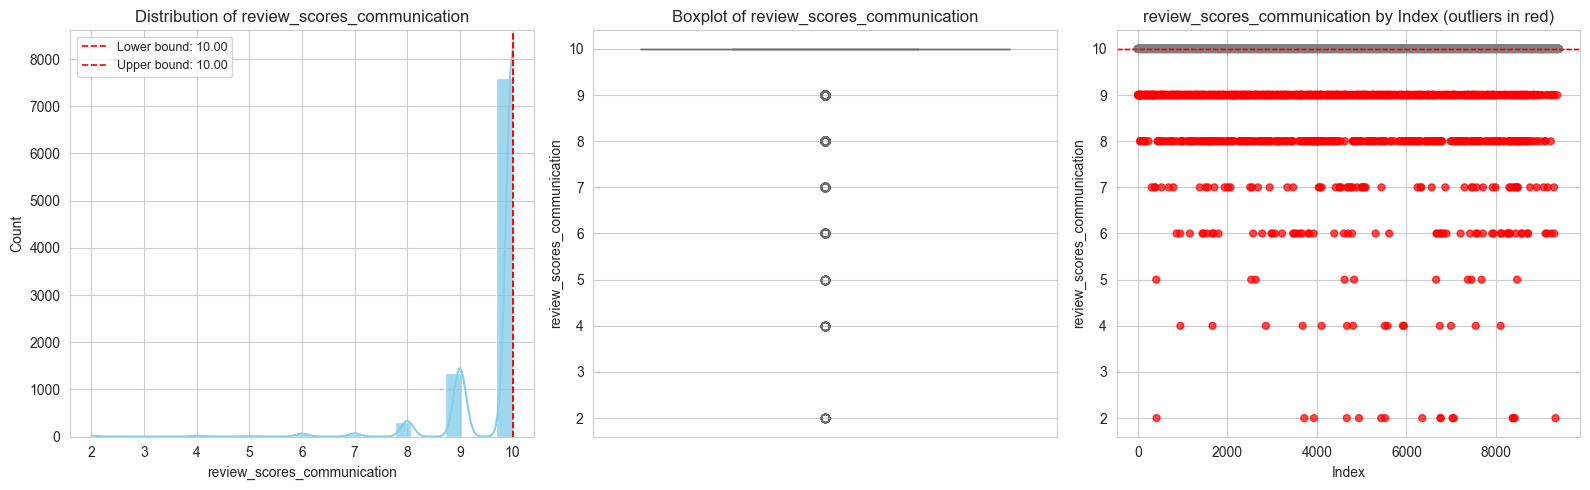

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -3.201
Outliers (IQR): 112 (1.2%)
Bounds: [7.500, 11.500]

   Outlier data points:
      review_scores_location
82                       7.0
327                      7.0
332                      7.0
387                      6.0
405                      7.0
493                      7.0
618                      7.0
679                      6.0
691                      7.0
823                      7.0
892                      7.0
952                      6.0
1070                     7.0
1078                     7.0
1185                     7.0
1270                     6.0
1390                     7.0
1436                     7.0
1554                     6.0
1668                     6.0
1669                     5.0
1702                     7.0
1785                     6.0
1803                     6.0
1978                     6.0
2048                     7.0
2105                     7.0
2263                     7.0
2481                     7.0
2556

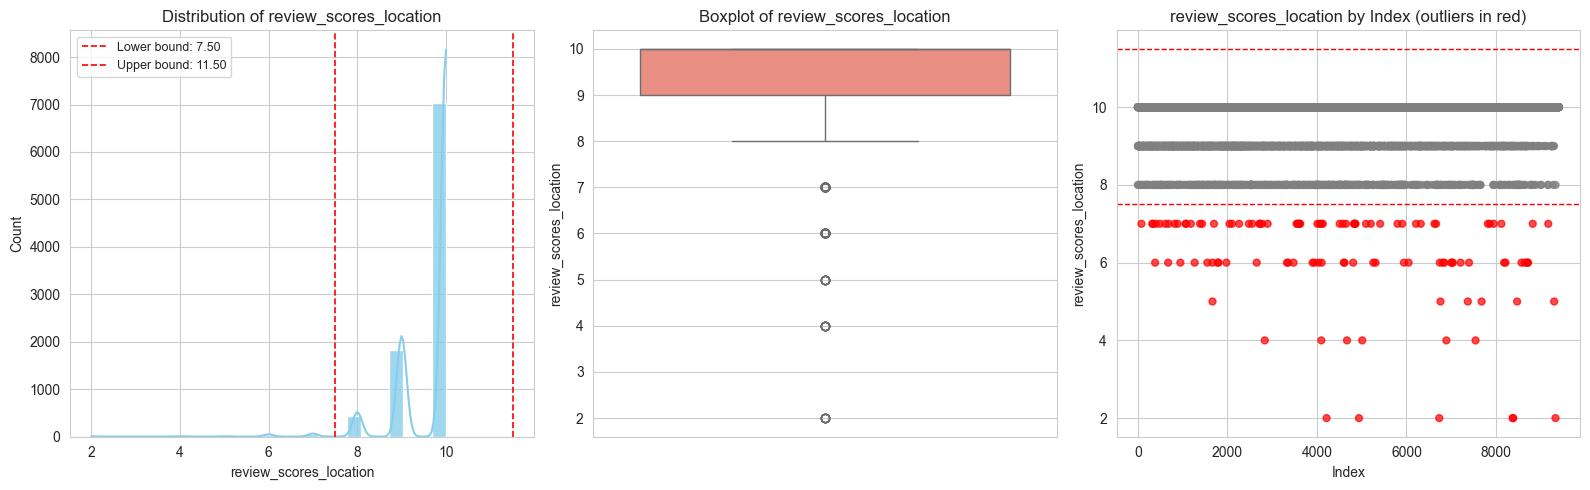

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -2.509
Outliers (IQR): 320 (3.4%)
Bounds: [7.500, 11.500]

   Outlier data points:
      review_scores_value
56                    7.0
118                   4.0
224                   7.0
332                   7.0
346                   7.0
385                   4.0
387                   6.0
413                   7.0
420                   6.0
446                   7.0
450                   6.0
508                   7.0
530                   7.0
617                   6.0
618                   7.0
661                   7.0
691                   7.0
699                   4.0
757                   6.0
796                   7.0
867                   5.0
887                   5.0
992                   7.0
1021                  7.0
1078                  7.0
1163                  6.0
1177                  4.0
1180                  7.0
1185                  6.0
1224                  7.0
1234                  7.0
1317                  5.0
1358            

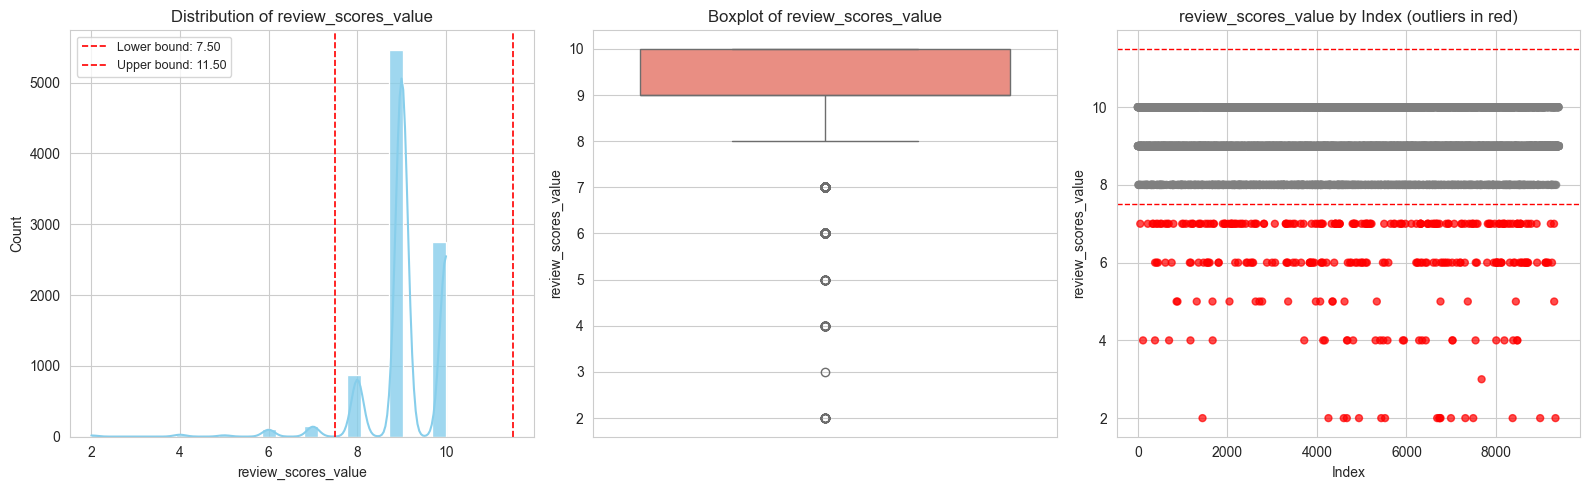

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -0.313
Outliers (IQR): 0 (0.0%)
Bounds: [-1.500, 2.500]


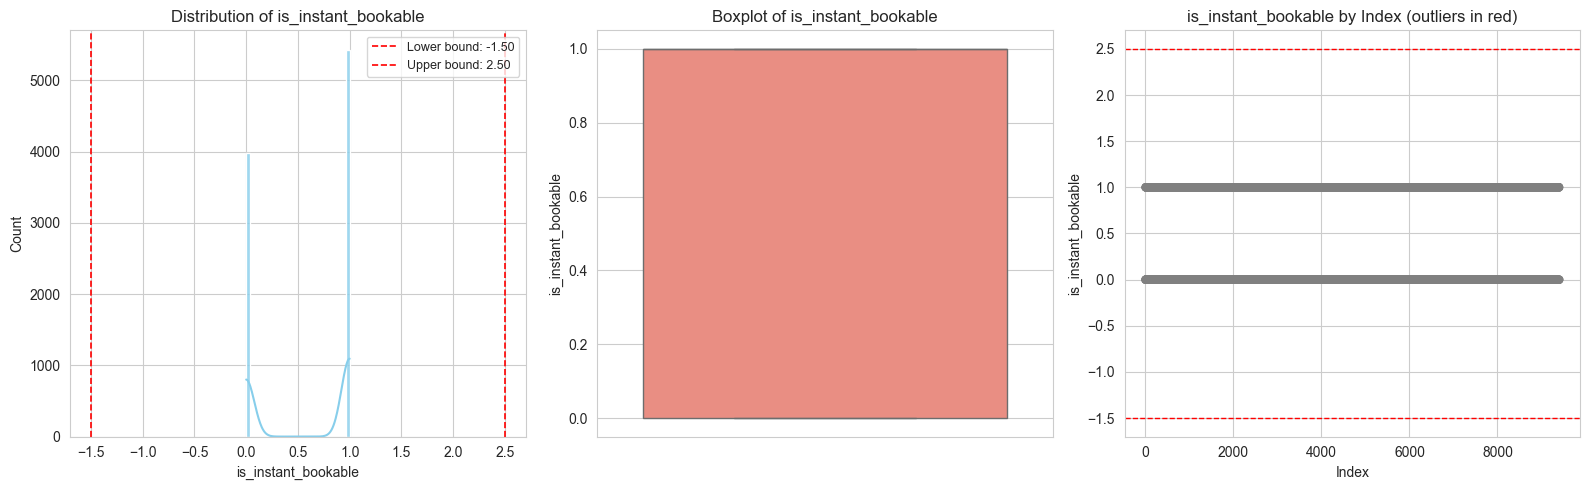

Shapiro-Wilk: Ignored (n > 5000)
Skewness: 5.404
Outliers (IQR): 1206 (12.8%)
Bounds: [-0.139, 0.419]

   Outlier data points:
      reviews_per_month
2              0.836473
3              4.273171
6              2.198350
9              0.675042
11             1.578068
13             1.877551
14             1.001475
15             0.443293
18             1.549296
19             1.029659
20             1.491748
25             0.953157
28             3.897564
29             0.695862
30             0.488682
31             0.568301
33             2.049336
34             2.412342
45             0.677062
51             0.451977
52             0.589124
59             2.163985
60             1.187351
61             0.868189
64             0.562036
67             0.451367
68             1.274014
69             2.443890
70             0.941226
81             0.445986
83             5.593465
88             2.304357
91             2.471410
98             0.530206
99             1.498761
103      

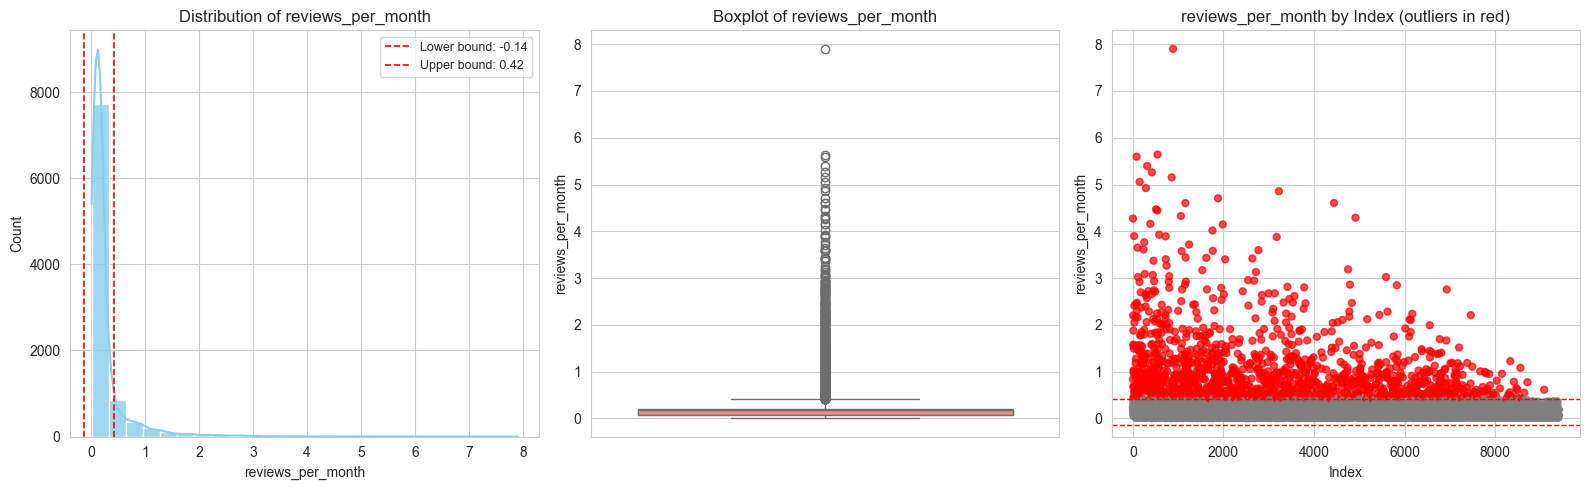

Shapiro-Wilk: Ignored (n > 5000)
Skewness: -0.247
Outliers (IQR): 0 (0.0%)
Bounds: [-35.000, 69.000]


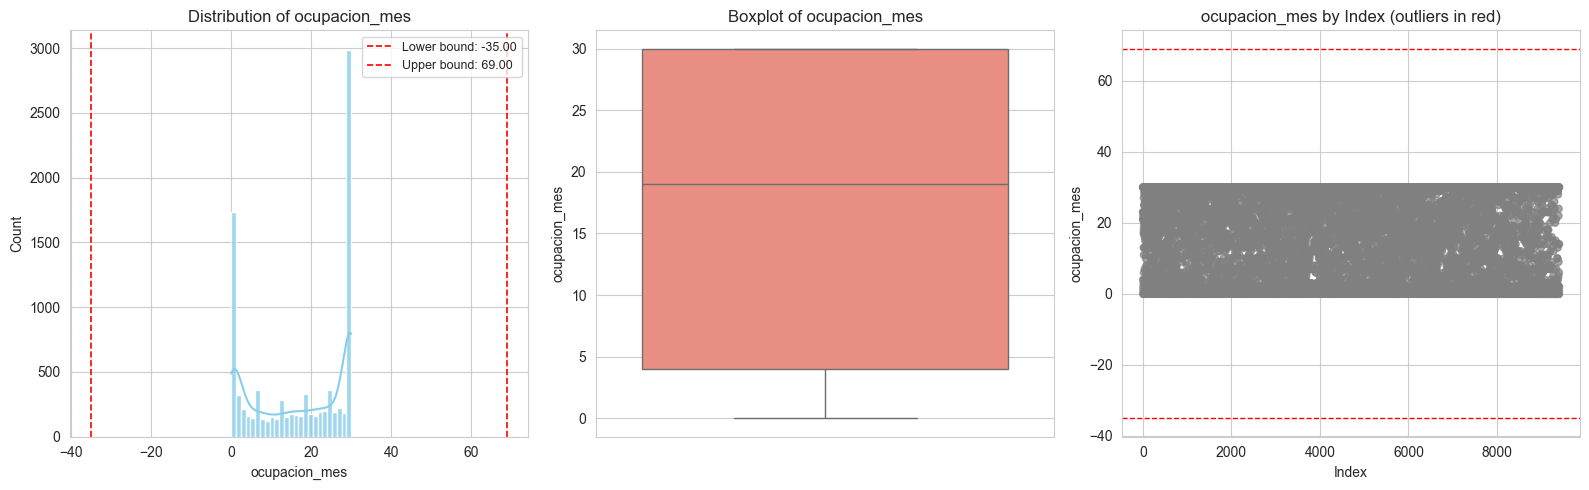

                     Column  Sample_Size  Skewness          Shapiro_p Normal  Outliers Outlier_Percentage
               apartment_id         9406     0.085 Ignored (n > 5000)    Yes         0               0.0%
               accommodates         9406     1.144 Ignored (n > 5000)     No        56               0.6%
                  bathrooms         9406     2.740 Ignored (n > 5000)     No       357               3.8%
                   bedrooms         9406     7.052 Ignored (n > 5000)     No        25               0.3%
                       beds         9406     1.913 Ignored (n > 5000)     No       161               1.7%
                      price         9406     2.094 Ignored (n > 5000)     No       715               7.6%
             minimum_nights         9406    33.986 Ignored (n > 5000)     No       616               6.5%
             maximum_nights         9406    -0.663 Ignored (n > 5000)     No         0               0.0%
            availability_30         9406     0

In [24]:
df_summary = analyze_outliers_and_normality(sprint_03)

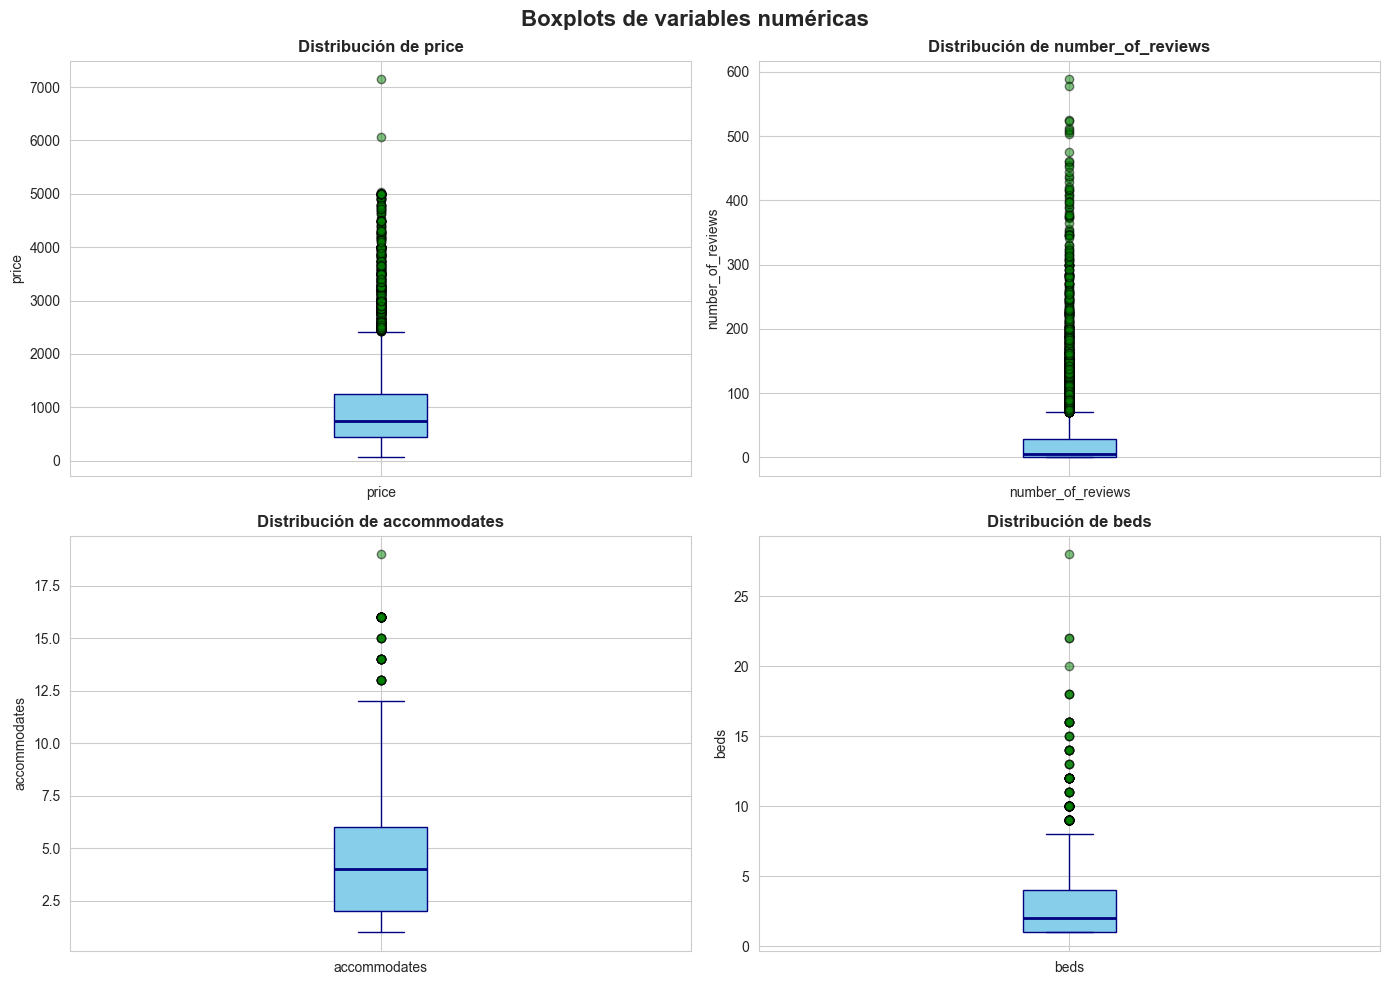

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

columnas = ['price', 'number_of_reviews', 'accommodates', 'beds']

for ax, col in zip(axes.flatten(), columnas):
    sprint_03.boxplot(column=col, ax=ax, patch_artist=True,
               boxprops=dict(facecolor='skyblue', color='navy'),
               medianprops=dict(color='navy', linewidth=2),
               whiskerprops=dict(color='navy'),
               capprops=dict(color='navy'),
               flierprops=dict(marker='o', markerfacecolor='green', alpha=0.5))
    ax.set_title(f"Distribución de {col}", fontsize=12, fontweight='bold')
    ax.set_ylabel(col)

plt.suptitle("Boxplots de variables numéricas", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

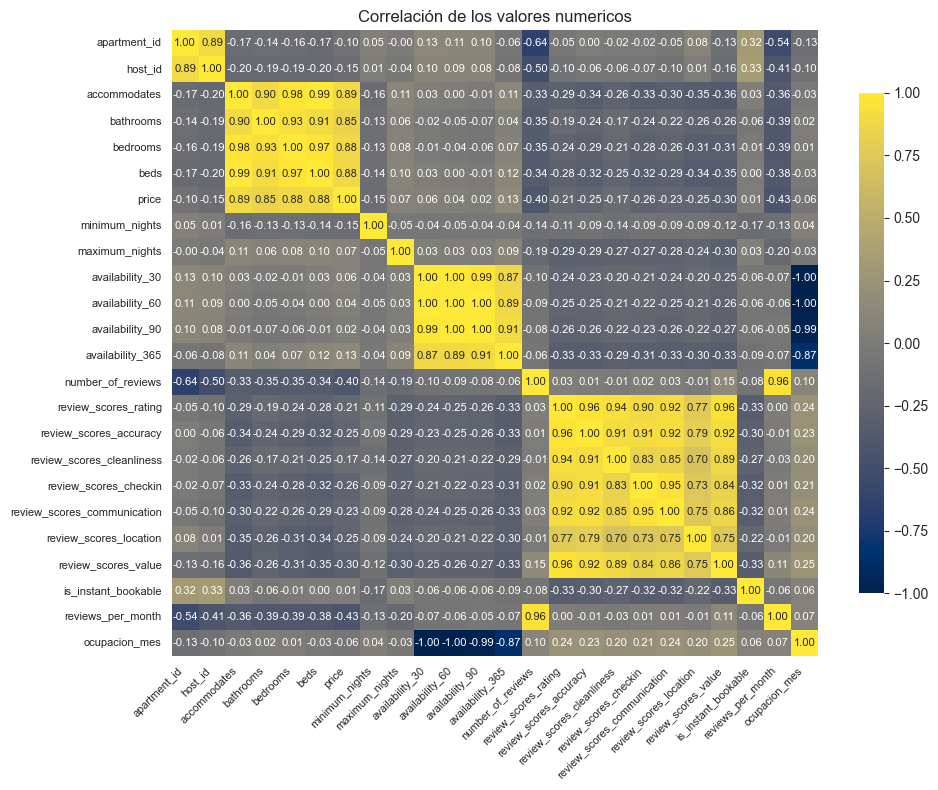

In [27]:
numeric_df = sprint_03.select_dtypes(include=['number'])
corr_pearson = numeric_df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
   corr_pearson.corr(),
    annot=True,
    cmap='cividis',
    fmt=".2f",                      # limits to 2 decimals
    annot_kws={"size": 8},          # controls number text size
    cbar_kws={"shrink": 0.8}        # makes colorbar smaller
)
plt.title(
    'Correlación de los valores numericos',
    fontsize=12                     # smaller title
)
plt.xticks(fontsize=8, rotation=45, ha='right')  # smaller rotated labels
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [28]:
roomsFilter = sprint_03.loc[:,
                     ['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
                    'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
                    'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
                    'maximum_nights', 'has_availability', 'availability_30',
                    'availability_60', 'availability_90', 'availability_365','city'
                         
                     ]
                     ]
roomsFilter

apartment_id                                               name  \
0            11964                                 A ROOM WITH A VIEW   
1            21853                               Bright and airy room   
2            32347  Explore Cultural Sights from a Family-Friendly...   
3            35379                  Double 02 CasanovaRooms Barcelona   
4            35801                  Can Torras Farmhouse Studio Suite   
...            ...                                                ...   
9401      47710189  Beautiful house in the centre in Santa Cristin...   
9402      47752964        Costa Brava - Palafrugell - playa y monta�a   
9403      47792016  MODERN AND BRIGHT NEW FLAT IN THE CENTER OF PA...   
9404      47884481                    MIT House Olavide III in Madrid   
9405      48061552                               Gran v�a Double Room   

                                            description    host_id  \
0     Private bedroom in our attic apartment. Right ...      45553   
1     We have a quiet and sunny room with a good vie...      83531   
2     Open French doors and step onto a plant-filled...     139939   
3     Room at a my apartment. Kitchen and 2 bathroom...     152232   
4     Lay in bed & watch sunlight change the mood of...     153805   
...                                                 ...        ...   
9401  Beautiful house in the center of Santa Cristin...  263841355   
9402  Piso con acceso directo a piscina. Lugar muy t...  282214688   
9403  Modern and new apartment in the old town of Pa...  263841355   
9404  The apartment is in a characteristic building ...  377605855   
9405                                                NaN  387478257   

                   neighbourhood_name neighbourhood_district        room_type  \
0                              Centro                    NaN     Private room   
1                            Cármenes                 Latina     Private room   
2                         San Vicente          Casco Antiguo  Entire home/apt   
3     L'Antiga Esquerra De L'Eixample               Eixample     Private room   
4                               Quart                    NaN     Private room   
...                               ...                    ...              ...   
9401             Santa Cristina D'Aro                    NaN  Entire home/apt   
9402                      Palafrugell                    NaN  Entire home/apt   
9403                          Palamós                    NaN  Entire home/apt   
9404                        Trafalgar               Chamberí  Entire home/apt   
9405                      Universidad                 Centro     Private room   

      accommodates  bathrooms  bedrooms  ...  \
0                2          2       1.0  ...   
1                1          1       1.0  ...   
2                4          1       2.0  ...   
3                2          2       1.0  ...   
4                5          1       2.0  ...   
...            ...        ...       ...  ...   
9401             8          2       4.0  ...   
9402             7          2       3.0  ...   
9403             6          1       3.0  ...   
9404             4          1       1.0  ...   
9405             2          2       1.0  ...   

                                         amenities_list   price  \
0     TV,Internet,Wifi,Air conditioning,Elevator,Buz...   400.0   
1     TV,Internet,Wifi,Air conditioning,Kitchen,Free...   170.0   
2     TV,Internet,Wifi,Air conditioning,Wheelchair a...   990.0   
3     TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...   400.0   
4     Wifi,Pool,Free parking on premises,Breakfast,P...   900.0   
...                                                 ...     ...   
9401  Essentials, Iron, Heating, Pool, Air condition...  1880.0   
9402  Wifi, Bathtub, Free parking on premises, BBQ g...  1130.0   
9403  Essentials, Wifi, Air conditioning, Dishes and...  1150.0   
9404  Patio or balcony, Bed linens, Coffee maker, Wa...   670.0   
9

In [29]:
reviewsFilter = sprint_03.loc[:,
                       ['number_of_reviews', 'first_review_date', 'last_review_date',
                        'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month','city','insert_date'
                           
                       ]
                       ]
reviewsFilter

number_of_reviews first_review_date last_review_date  \
0                  78.0        2010-02-01       2017-05-09   
1                  33.0        2014-10-10              NaN   
2                 148.0        2011-05-01              NaN   
3                 292.0               NaN       2020-04-01   
4                  36.0        2011-08-07       2018-08-08   
...                 ...               ...              ...   
9401                0.0               NaN              NaN   
9402                0.0               NaN              NaN   
9403                0.0               NaN              NaN   
9404                0.0               NaN              NaN   
9405                0.0               NaN              NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                     97.0                    10.0                       10.0   
1                     92.0                     9.0                        9.0   
2                     98.0                    10.0                       10.0   
3                     94.0                    10.0                        9.0   
4                     97.0                    10.0                       10.0   
...                    ...                     ...                        ...   
9401                  94.0                    10.0                       10.0   
9402                  94.0                    10.0                       10.0   
9403                  94.0                    10.0                       10.0   
9404                  95.0                    10.0                       10.0   
9405                  95.0                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
0                      10.0                         10.0   
1                      10.0                         10.0   
2                      10.0                         10.0   
3                      10.0                         10.0   
4                      10.0                         10.0   
...                     ...                          ...   
9401                   10.0                         10.0   
9402                   10.0                         10.0   
9403                   10.0                         10.0   
9404                   10.0                         10.0   
9405                   10.0                         10.0   

      review_scores_location  review_scores_value  is_instant_bookable  \
0                       10.0                 10.0                    0   
1                        8.0                  9.0                    0   
2                       10.0                 10.0                    1   
3                       10.0                  9.0                    1   
4                       10.0                 10.0                    0   
...                      ...                  ...                  ...   
9401                    10.0                  9.0                    1   
9402                    10.0                  9.0                    0   
9403                    10.0                  9.0                    1   
9404                    10.0                  9.0                    0   
9405                    10.0                  9.0                    0   

      reviews_per_month       city insert_date  
0              0.406109     Málaga  2018-07-31  
1              0.244444     Madrid  2020-01-10  
2              0.836473    Sevilla  2019-07-29  
3              4.273171  Barcelona  2020-01-10  
4              0.207294     Girona  2019-02-19  
...                 ...        ...         ...  
9401           0.070061     Girona  2021-01-31  
9402           0.070061     Girona  2021-02-27  
9403           0.070061     Girona  2021-01-31  
9404           0.181622     Madrid  2021-02-09  
9405           0.181622     Madrid  2021-02-09  

[9406 rows x 14 columns]

In [30]:
rooms = sprint_03.loc[:,
                ['accommodates', 'bathrooms',
                'bedrooms', 'beds', 'price', 'minimum_nights',
                'maximum_nights', 'availability_30',
                'availability_60', 'availability_90', 'availability_365']
               ]
rooms

accommodates  bathrooms  bedrooms  beds   price  minimum_nights  \
0                2          2       1.0   1.0   400.0               3   
1                1          1       1.0   1.0   170.0               4   
2                4          1       2.0   2.0   990.0               2   
3                2          2       1.0   1.0   400.0               2   
4                5          1       2.0   5.0   900.0               1   
...            ...        ...       ...   ...     ...             ...   
9401             8          2       4.0   6.0  1880.0               1   
9402             7          2       3.0   4.0  1130.0               1   
9403             6          1       3.0   4.0  1150.0               1   
9404             4          1       1.0   2.0   670.0               1   
9405             2          2       1.0   1.0   180.0               1   

      maximum_nights  availability_30  availability_60  availability_90  \
0                365                7               20               40   
1                 40                0                0                0   
2                120               26               31               31   
3                730                9               23               49   
4                180                0               19               49   
...              ...              ...              ...              ...   
9401             365                0                0                0   
9402            1125               29               59               89   
9403             365                0                0                0   
9404             365               16               46               76   
9405             365               28               58               88   

      availability_365  
0                  130  
1                  162  
2                  270  
3                  300  
4                  312  
...                ...  
9401                31  
9402               364  
9403                69  
9404               351  
9405               178  

[9406 rows x 11 columns]

In [31]:
reviews = sprint_03.loc[:, 
                    ['number_of_reviews', 'first_review_date', 'last_review_date',
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value']
                    ]
reviews


number_of_reviews first_review_date last_review_date  \
0                  78.0        2010-02-01       2017-05-09   
1                  33.0        2014-10-10              NaN   
2                 148.0        2011-05-01              NaN   
3                 292.0               NaN       2020-04-01   
4                  36.0        2011-08-07       2018-08-08   
...                 ...               ...              ...   
9401                0.0               NaN              NaN   
9402                0.0               NaN              NaN   
9403                0.0               NaN              NaN   
9404                0.0               NaN              NaN   
9405                0.0               NaN              NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                     97.0                    10.0                       10.0   
1                     92.0                     9.0                        9.0   
2                     98.0                    10.0                       10.0   
3                     94.0                    10.0                        9.0   
4                     97.0                    10.0                       10.0   
...                    ...                     ...                        ...   
9401                  94.0                    10.0                       10.0   
9402                  94.0                    10.0                       10.0   
9403                  94.0                    10.0                       10.0   
9404                  95.0                    10.0                       10.0   
9405                  95.0                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
0                      10.0                         10.0   
1                      10.0                         10.0   
2                      10.0                         10.0   
3                      10.0                         10.0   
4                      10.0                         10.0   
...                     ...                          ...   
9401                   10.0                         10.0   
9402                   10.0                         10.0   
9403                   10.0                         10.0   
9404                   10.0                         10.0   
9405                   10.0                         10.0   

      review_scores_location  review_scores_value  
0                       10.0                 10.0  
1                        8.0                  9.0  
2                       10.0                 10.0  
3                       10.0                  9.0  
4                       10.0                 10.0  
...                      ...                  ...  
9401                    10.0                  9.0  
9402                    10.0                  9.0  
9403                    10.0                  9.0  
9404                    10.0                  9.0  
9405                    10.0                  9.0  

[9406 rows x 10 columns]

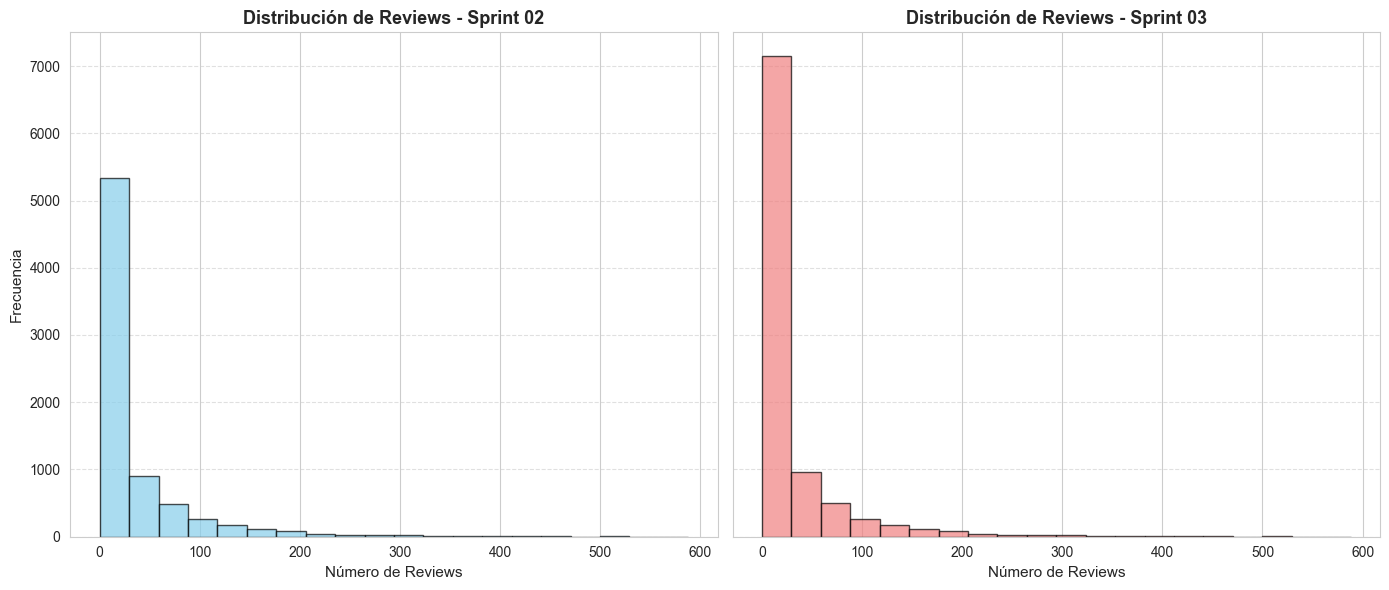

In [33]:
# Criar a figura com 2 subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Sprint 02 ---
axes[0].hist(
    sprint_02['number_of_reviews'], 
    bins=20, 
    color='skyblue', 
    edgecolor='black', 
    alpha=0.7
)
axes[0].set_title("Distribución de Reviews - Sprint 02", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Número de Reviews", fontsize=11)
axes[0].set_ylabel("Frecuencia", fontsize=11)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Sprint 03 ---
axes[1].hist(
    sprint_03['number_of_reviews'], 
    bins=20, 
    color='lightcoral', 
    edgecolor='black', 
    alpha=0.7
)
axes[1].set_title("Distribución de Reviews - Sprint 03", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Número de Reviews", fontsize=11)
axes[1].set_ylabel("")
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar layout
plt.tight_layout()
plt.show()


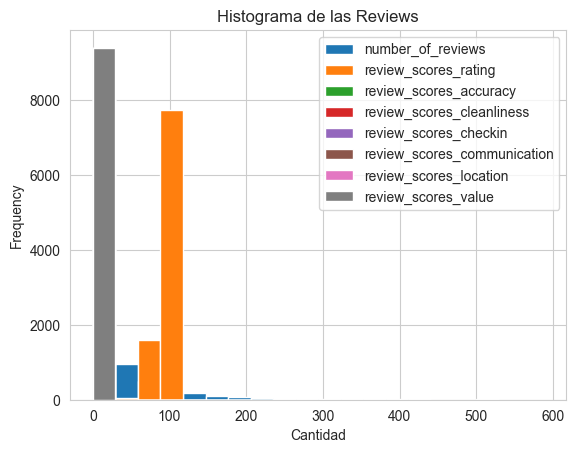

In [34]:
reviewsPlot = reviews.plot.hist(bins=20)
plt.title('Histograma de las Reviews')
plt.xlabel('Cantidad')
plt.show()

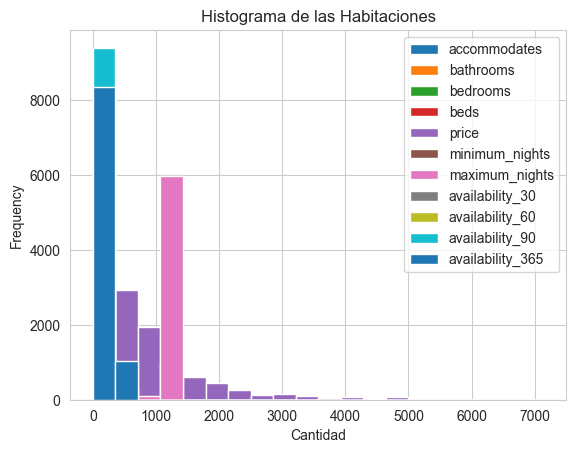

In [35]:
roomsPlot = rooms.plot.hist(bins=20)
plt.title('Histograma de las Habitaciones')
plt.xlabel('Cantidad')
plt.show()

<Figure size 5000x600 with 0 Axes>

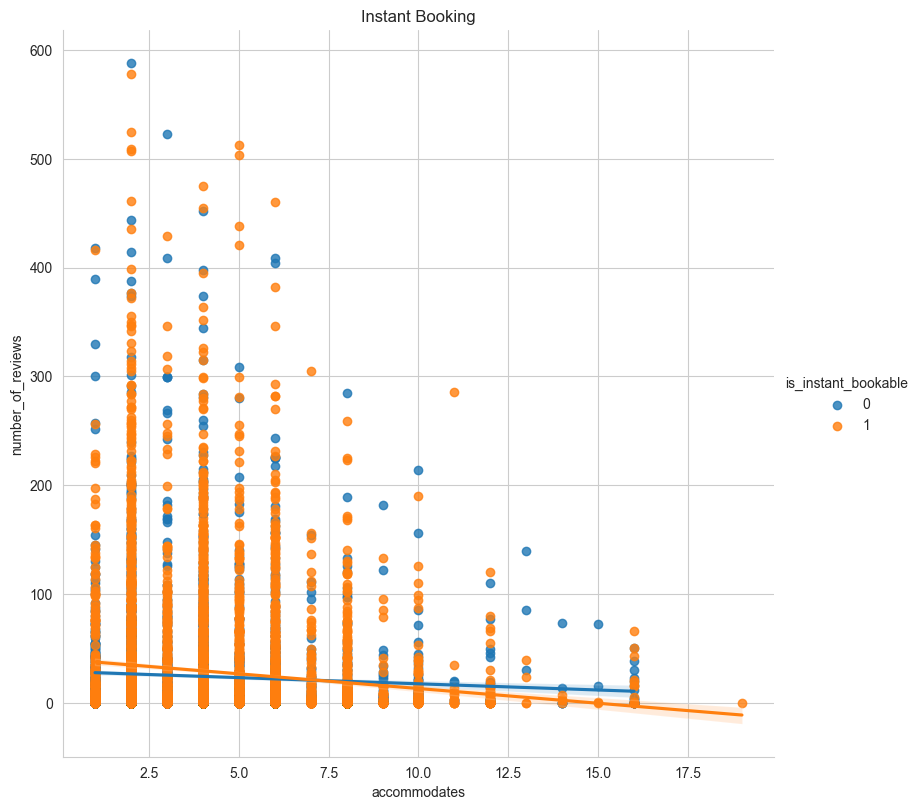

In [38]:
plt.figure(figsize=(50, 6))
sns.lmplot(data = sprint_03, x='accommodates', y='number_of_reviews',hue = 'is_instant_bookable',height=8)
plt.title('Instant Booking')
plt.show()

<Figure size 5000x600 with 0 Axes>

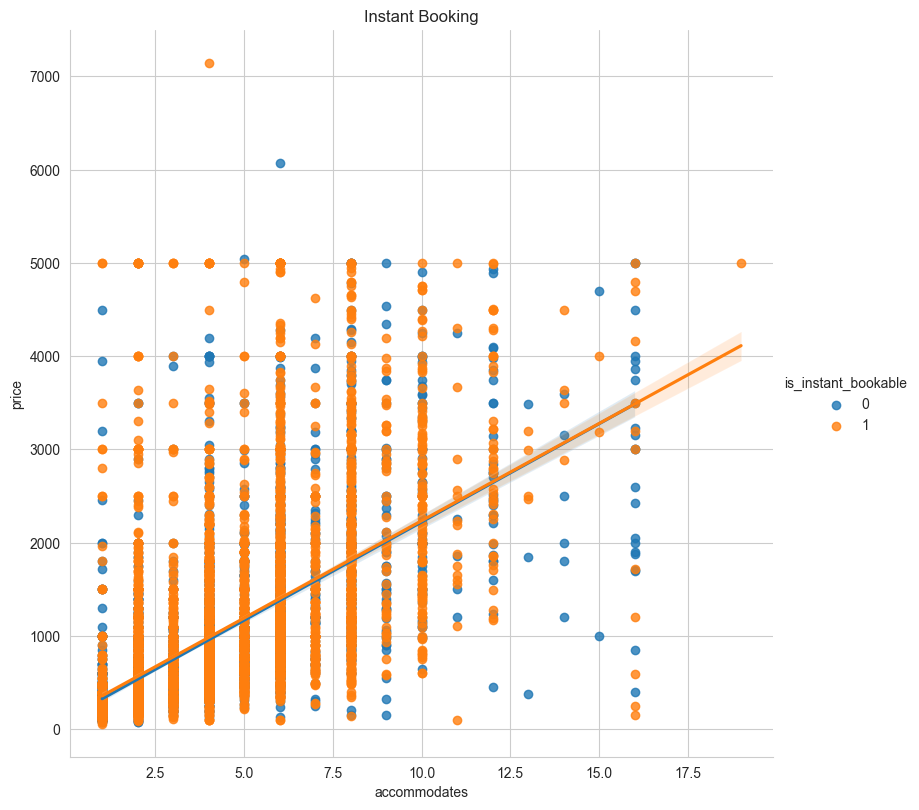

In [37]:
plt.figure(figsize=(50, 6))
sns.lmplot(data = sprint_03, x='accommodates', y='price',hue = 'is_instant_bookable',height=8)
plt.title('Instant Booking')
plt.show()

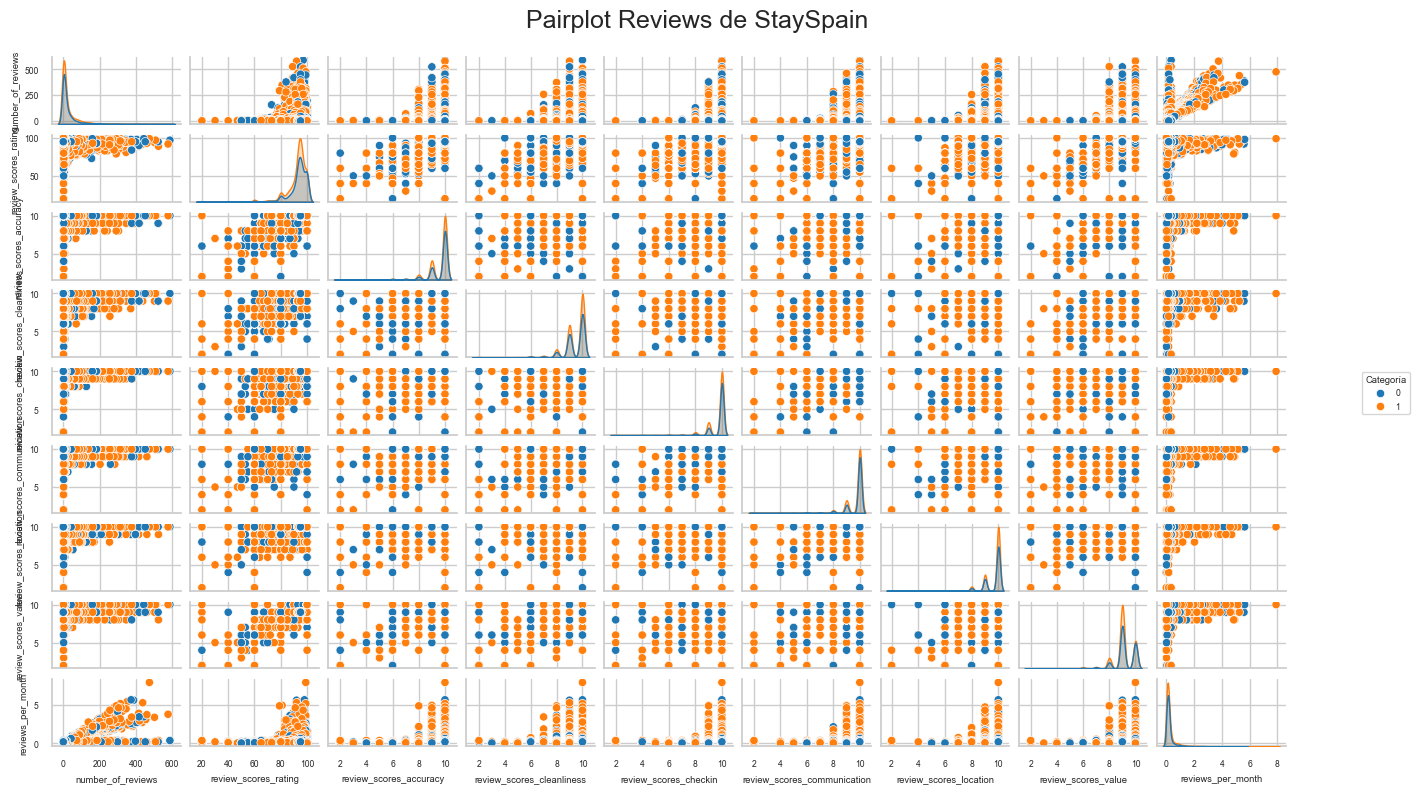

In [39]:
sns.set_context("notebook", font_scale=0.56) 
sns.set_style("whitegrid")
plot = sns.pairplot(reviewsFilter,hue='is_instant_bookable')

plot.fig.set_size_inches(14, 8)  # (ancho, alto)

plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.92, right=0.92)

plot.fig.suptitle('Pairplot Reviews de StaySpain', fontsize=18)

plot._legend.set_bbox_to_anchor((1.01, 0.5))  # (x, y) → x > 1 para que salga fuera  # opción para ponerle un borde
plot._legend.set_title("Categoría")  # cambia el título de la leyenda si quieres
plot._legend.set_frame_on(True)

plt.show()

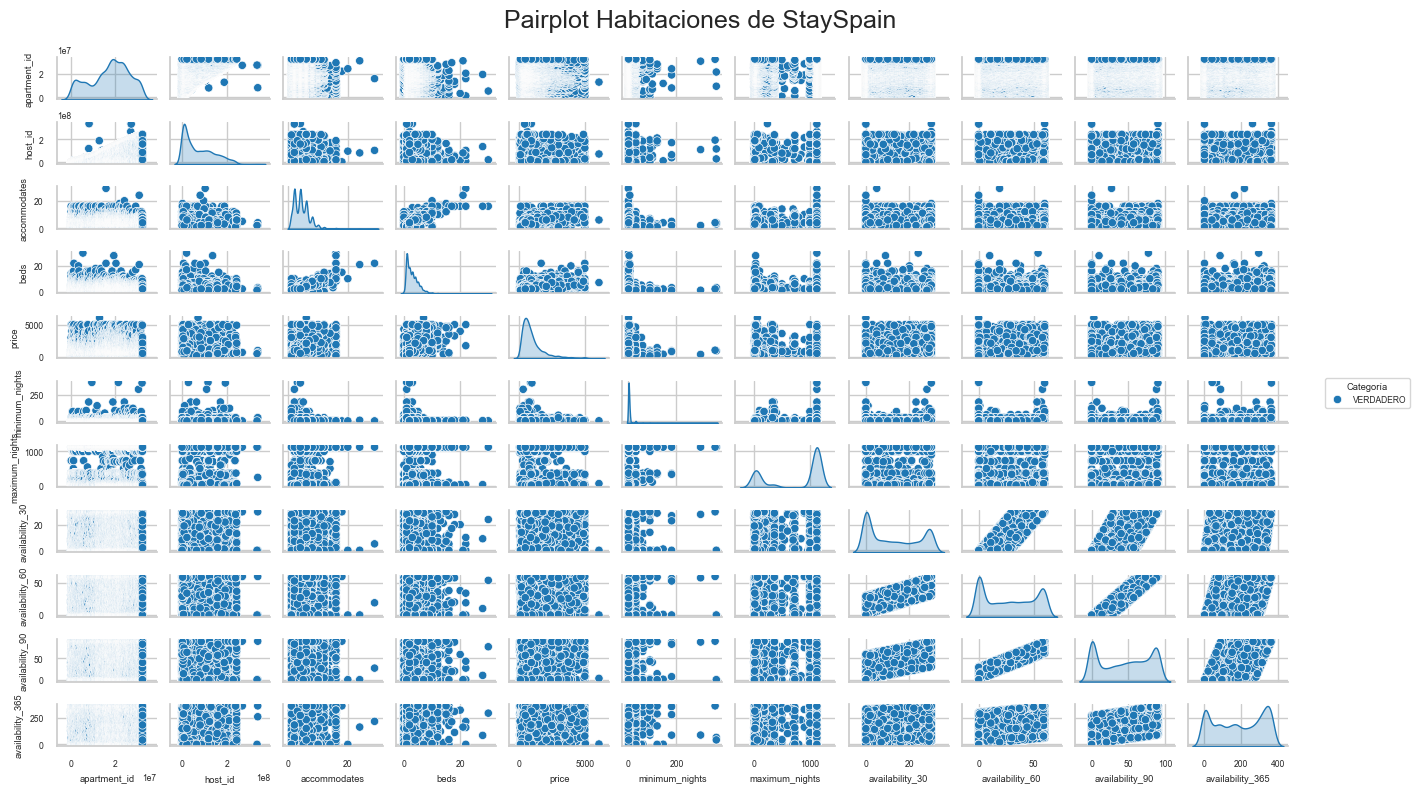

In [ ]:
sns.set_context("notebook", font_scale=0.56) 
sns.set_style("whitegrid")
plot = sns.pairplot(roomsFilter,hue='has_availability')

plot.fig.set_size_inches(14, 8)  # (ancho, alto)

plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.92, right=0.92)

plot.fig.suptitle('Pairplot Habitaciones de StaySpain', fontsize=18)

plot._legend.set_bbox_to_anchor((1.01, 0.5))  # (x, y) → x > 1 para que salga fuera  # opción para ponerle un borde
plot._legend.set_title("Categoría")  # cambia el título de la leyenda si quieres
plot._legend.set_frame_on(True)

plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2570435625.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='accommodates', ylabel='price'>

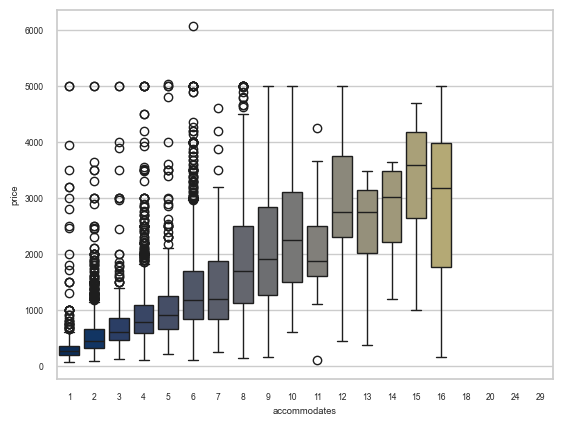

In [ ]:
sns.boxplot(
    data=dfnumerics,
    x='accommodates',
    y='price',
    palette='cividis'
)


In [ ]:
reviewsFilter

number_of_reviews first_review_date last_review_date  \
0                    78        02/01/2010       05/09/2017   
1                    33        10/10/2014       15/07/2018   
2                   148        05/01/2011       22/07/2019   
3                   292        13/03/2012       04/01/2020   
4                    36        08/07/2011       08/08/2018   
...                 ...               ...              ...   
7995                  0              None             None   
7996                 36        17/03/2019       09/09/2020   
7997                  0              None             None   
7998                 21        04/03/2019       28/07/2019   
7999                  3        21/04/2019       29/06/2019   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                    970.0                   100.0                      100.0   
1                    920.0                    90.0                       90.0   
2                    980.0                   100.0                      100.0   
3                    940.0                   100.0                       90.0   
4                    970.0                   100.0                      100.0   
...                    ...                     ...                        ...   
7995                   NaN                     NaN                        NaN   
7996                1000.0                   100.0                      100.0   
7997                   NaN                     NaN                        NaN   
7998                 980.0                   100.0                      100.0   
7999                 930.0                    90.0                       90.0   

      review_scores_checkin  review_scores_communication  \
0                     100.0                        100.0   
1                     100.0                        100.0   
2                     100.0                        100.0   
3                     100.0                        100.0   
4                     100.0                        100.0   
...                     ...                          ...   
7995                    NaN                          NaN   
7996                  100.0                        100.0   
7997                    NaN                          NaN   
7998                  100.0                        100.0   
7999                   90.0                         90.0   

      review_scores_location  review_scores_value is_instant_bookable  \
0                      100.0                100.0               FALSO   
1                       80.0                 90.0               FALSO   
2                      100.0                100.0           VERDADERO   
3                      100.0                 90.0           VERDADERO   
4                      100.0                100.0               FALSO   
...                      ...                  ...                 ...   
7995                     NaN                  NaN           VERDADERO   
7996                   100.0                100.0               FALSO   
7997                     NaN                  NaN           VERDADERO   
7998                   100.0                100.0           VERDADERO   
7999                    90.0                 90.0               FALSO   

      reviews_per_month       city insert_date  
0                  75.0     malaga  31/07/2018  
1                  52.0     madrid  10/01/2020  
2                 142.0    sevilla  29/07/2019  
3                 306.0  barcelona  10/01/2020  
4                  39.0     girona  19/02/2019  
...                 ...        ...         ...  
7995                NaN  barcelona  16/10/2019  
7996              157.0    sevilla  31/01/2021  
7997                NaN   mallorca  24/04/2019  
7998              389.0  barcelona  12/08/2019  
7999               68.0     girona  31/08/2019  

[8000 rows x 14 columns]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\1511481106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='number_of_reviews'>

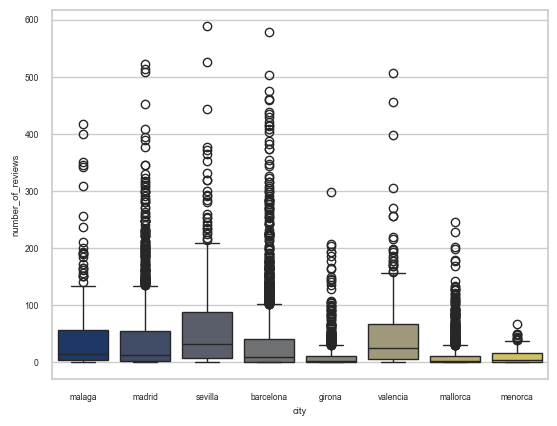

In [ ]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='number_of_reviews',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\3277157076.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='price'>

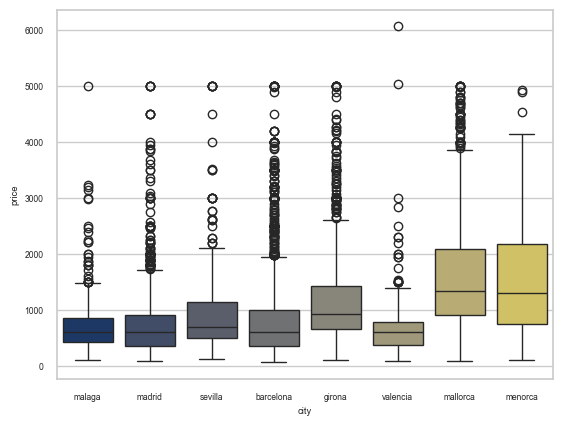

In [ ]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='price',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2958375681.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='room_type', ylabel='price'>

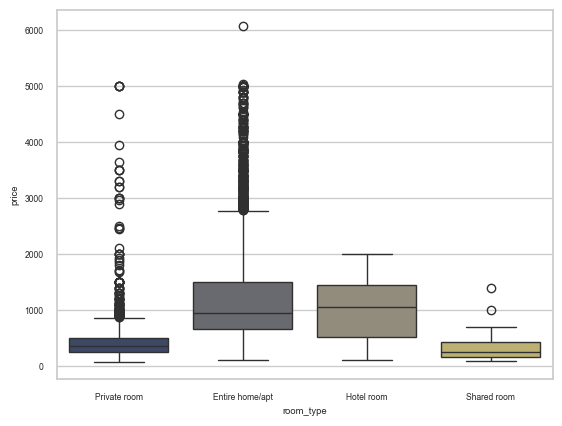

In [ ]:
sns.boxplot(
    data=roomsFilter,
    x='room_type',
    y='price',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\1233295759.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='bedrooms', ylabel='price'>

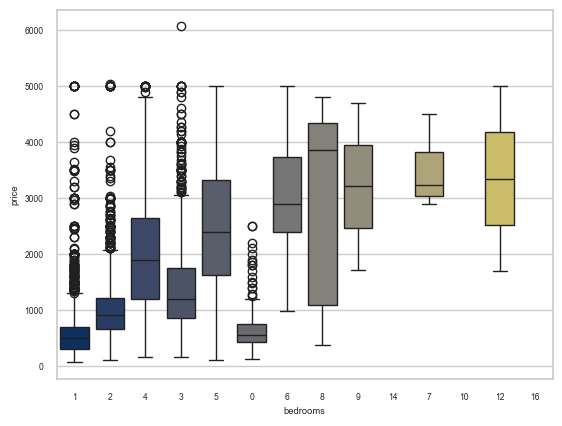

In [ ]:
sns.boxplot(
    data=roomsFilter,
    x='bedrooms',
    y='price',
    palette='cividis'
)

In [ ]:
reviewsFilter

number_of_reviews first_review_date last_review_date  \
0                    78        02/01/2010       05/09/2017   
1                    33        10/10/2014       15/07/2018   
2                   148        05/01/2011       22/07/2019   
3                   292        13/03/2012       04/01/2020   
4                    36        08/07/2011       08/08/2018   
...                 ...               ...              ...   
7995                  0              None             None   
7996                 36        17/03/2019       09/09/2020   
7997                  0              None             None   
7998                 21        04/03/2019       28/07/2019   
7999                  3        21/04/2019       29/06/2019   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                    970.0                   100.0                      100.0   
1                    920.0                    90.0                       90.0   
2                    980.0                   100.0                      100.0   
3                    940.0                   100.0                       90.0   
4                    970.0                   100.0                      100.0   
...                    ...                     ...                        ...   
7995                   NaN                     NaN                        NaN   
7996                1000.0                   100.0                      100.0   
7997                   NaN                     NaN                        NaN   
7998                 980.0                   100.0                      100.0   
7999                 930.0                    90.0                       90.0   

      review_scores_checkin  review_scores_communication  \
0                     100.0                        100.0   
1                     100.0                        100.0   
2                     100.0                        100.0   
3                     100.0                        100.0   
4                     100.0                        100.0   
...                     ...                          ...   
7995                    NaN                          NaN   
7996                  100.0                        100.0   
7997                    NaN                          NaN   
7998                  100.0                        100.0   
7999                   90.0                         90.0   

      review_scores_location  review_scores_value is_instant_bookable  \
0                      100.0                100.0               FALSO   
1                       80.0                 90.0               FALSO   
2                      100.0                100.0           VERDADERO   
3                      100.0                 90.0           VERDADERO   
4                      100.0                100.0               FALSO   
...                      ...                  ...                 ...   
7995                     NaN                  NaN           VERDADERO   
7996                   100.0                100.0               FALSO   
7997                     NaN                  NaN           VERDADERO   
7998                   100.0                100.0           VERDADERO   
7999                    90.0                 90.0               FALSO   

      reviews_per_month       city insert_date  
0                  75.0     malaga  31/07/2018  
1                  52.0     madrid  10/01/2020  
2                 142.0    sevilla  29/07/2019  
3                 306.0  barcelona  10/01/2020  
4                  39.0     girona  19/02/2019  
...                 ...        ...         ...  
7995                NaN  barcelona  16/10/2019  
7996              157.0    sevilla  31/01/2021  
7997                NaN   mallorca  24/04/2019  
7998              389.0  barcelona  12/08/2019  
7999               68.0     girona  31/08/2019  

[8000 rows x 14 columns]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2974616239.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='reviews_per_month'>

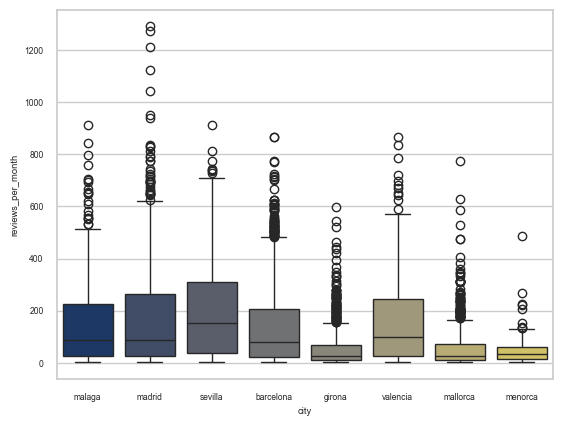

In [ ]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='reviews_per_month',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2798830327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='review_scores_rating'>

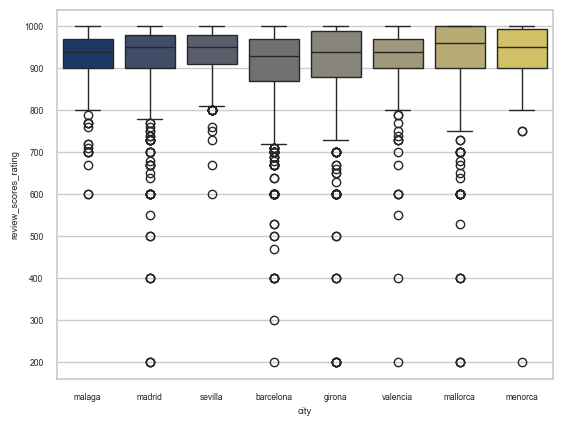

In [ ]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='review_scores_rating',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\1095599709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='review_scores_value'>

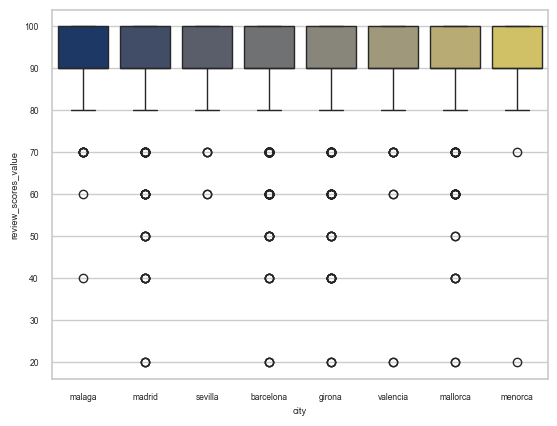

In [ ]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='review_scores_value',
    palette='cividis'
)

In [ ]:
roomsFilter.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365', 'city'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\695336772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_30'>

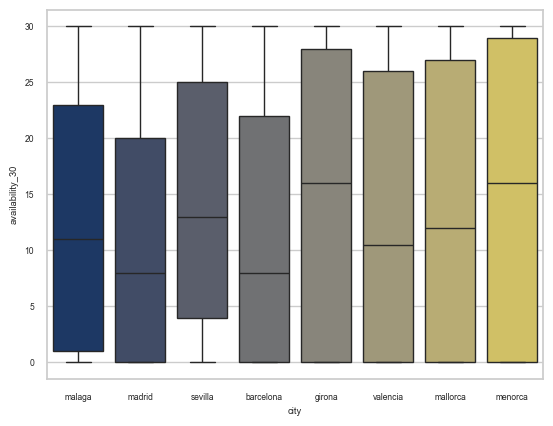

In [ ]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_30',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\3556815173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_60'>

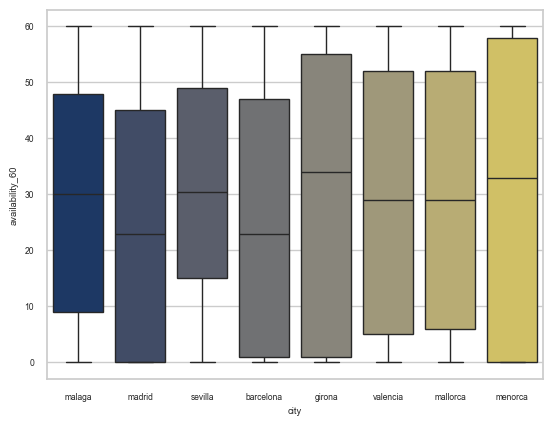

In [ ]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_60',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\3260253664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_90'>

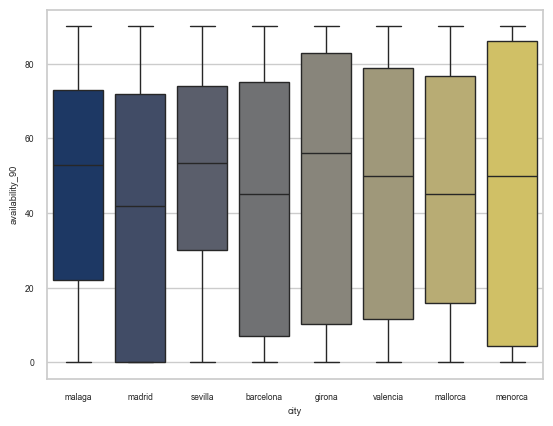

In [ ]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_90',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\1577553409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_365'>

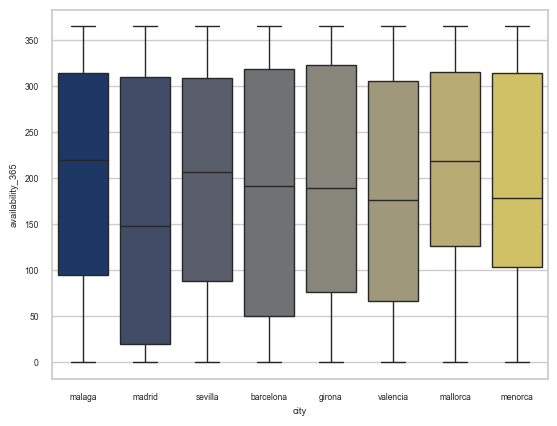

In [ ]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_365',
    palette='cividis'
)